# Statystyka wielowymiarowa

Maciej Czyjt 

Tomasz Słonina

# Preprocess data

In [23]:
preprocess <- function(data) {
  # Remove columns with excessive missing values
  data <- data[, colSums(is.na(data)) < 0.4 * nrow(data)]
  
  # Impute missing values for numerical variables
  num_vars <- sapply(data, is.numeric)
  data[num_vars] <- lapply(data[num_vars], function(x) ifelse(is.na(x), mean(x, na.rm = TRUE), x))
  
  # Impute missing values for categorical variables
  cat_vars <- sapply(data, is.factor)
  data[cat_vars] <- lapply(data[cat_vars], function(x) ifelse(is.na(x), "NA", x))
  
  # Convert categorical variables to factors
  data[cat_vars] <- lapply(data[cat_vars], as.factor)
  
  # Normalize numerical variables
  data[num_vars] <- lapply(data[num_vars], function(x) (x - mean(x)) / sd(x))
                           
  return(data)
}

# function that removes columns with only one unqie value 
remove_unique <- function(data) {
  data <- data[, sapply(data, function(x) length(unique(x))) > 1]
  return(data)
}

In [24]:
library(leaps)

# Load dataset into dataframe

In [25]:
path <- "./AmesHousing.csv"
data <- read.csv(path)
column_list <- c('Fireplaces', 'Overall.Cond', 'MS.SubClass', "Open.Porch.SF", "Wood.Deck.SF", 'Land.Slope', 'Lot.Area', "Lot.Frontage", "Year.Built", "Roof.Style", "Utilities", "Street", "Full.Bath", "Half.Bath", "Bedroom.AbvGr", "Kitchen.AbvGr", "Garage.Area", "Paved.Drive", "Sale.Condition", "SalePrice", "Yr.Sold", "Garage.Cars", "Heating", "Electrical", "Exterior.1st", "Exterior.2nd", "Overall.Qual", "Central.Air")
data <- data[, column_list]
data <- preprocess(data)
data <- remove_unique(data)
data <- na.omit(data)
data_numeric <- data[, sapply(data, is.numeric)]
dim(data_numeric)

[1] 2930   17

In [26]:
names(data)

[1] "Fireplaces"     "Overall.Cond"   "MS.SubClass"    "Open.Porch.SF" 
 [5] "Wood.Deck.SF"   "Land.Slope"     "Lot.Area"       "Lot.Frontage"  
 [9] "Year.Built"     "Roof.Style"     "Utilities"      "Street"        
[13] "Full.Bath"      "Half.Bath"      "Bedroom.AbvGr"  "Kitchen.AbvGr" 
[17] "Garage.Area"    "Paved.Drive"    "Sale.Condition" "SalePrice"     
[21] "Yr.Sold"        "Garage.Cars"    "Heating"        "Electrical"    
[25] "Exterior.1st"   "Exterior.2nd"   "Overall.Qual"   "Central.Air"

In [27]:
head(data)

,Fireplaces,Overall.Cond,MS.SubClass,Open.Porch.SF,Wood.Deck.SF,Land.Slope,Lot.Area,Lot.Frontage,Year.Built,Roof.Style,⋯,Sale.Condition,SalePrice,Yr.Sold,Garage.Cars,Heating,Electrical,Exterior.1st,Exterior.2nd,Overall.Qual,Central.Air
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
1,2.1618110,-0.5066319,-0.8768552,0.2143720,0.9199643,Gtl,2.74391236,3.3663359,-0.3754729,Hip,⋯,Normal,0.4281557,1.678213,0.3066468,GasA,SBrkr,BrkFace,Plywood,-0.06724223,Y
2,-0.9249854,0.3930236,-0.8768552,-0.7043724,0.3659983,Gtl,0.18706533,0.5053771,-0.3424100,Gable,⋯,Normal,-0.9487946,1.678213,-1.0083874,GasA,SBrkr,VinylSd,VinylSd,-0.77594635,Y
3,-0.9249854,0.3930236,-0.8768552,-0.1709079,2.3681895,Gtl,0.52272448,0.5522781,-0.4415988,Hip,⋯,Normal,-0.1101067,1.678213,-1.0083874,GasA,SBrkr,Wd Sdng,Wd Sdng,-0.06724223,Y
4,2.1618110,-0.5066319,-0.8768552,-0.7043724,-0.7419335,Gtl,0.12843602,1.1150897,-0.1109695,Hip,⋯,Normal,0.7911698,1.678213,0.3066468,GasA,SBrkr,BrkFace,BrkFace,0.64146189,Y
5,0.6184128,-0.5066319,0.0612746,-0.2005448,0.9357919,Gtl,0.46726775,0.2239713,0.8478552,Gable,⋯,Normal,0.1139607,1.678213,0.3066468,GasA,SBrkr,VinylSd,VinylSd,-0.77594635,Y
6,0.6184128,0.3930236,0.0612746,-0.1709079,2.1070341,Gtl,-0.02156364,0.4115752,0.8809181,Gable,⋯,Normal,0.1840599,1.678213,0.3066468,GasA,SBrkr,VinylSd,VinylSd,-0.06724223,Y


# Linear Regression

## SalePrice ~ Overall.Qual

In [28]:
fit_simple <- lm(data$SalePrice ~ data$Overall.Qual)
coef(fit_simple)

(Intercept) data$Overall.Qual 
    -1.606469e-16      7.992618e-01

Otrzymano model:
$Y$ = 0.799261794769011 $X$   -1.60646865265323e-16

In [29]:
summaryList <- summary(fit_simple)
summaryList$sigma
summaryList$r.squared
summaryList$fstatistic

[1] 0.6010856

[1] 0.6388194

value    numdf    dendf 
5178.748    1.000 2928.000

Przeciętny błąd prognozowania dla modelu wynosi około 0.601.

Wartość współczynnika R-kwadrat świadczy o tym, że około 64% zmienności SalePrice może być wyjaśnione przez Overall.Qual.

In [9]:
summary(fit_simple)
confint(fit_simple)



Call:
lm(formula = data$SalePrice ~ data$Overall.Qual)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4723 -0.3662 -0.0286  0.2711  4.9757 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.606e-16  1.110e-02    0.00        1    
data$Overall.Qual  7.993e-01  1.111e-02   71.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6011 on 2928 degrees of freedom
Multiple R-squared:  0.6388,	Adjusted R-squared:  0.6387 
F-statistic:  5179 on 1 and 2928 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),-0.0217736,0.0217736
data$Overall.Qual,0.7774845,0.8210391


Model regresji liniowej na podstawie zmiennej "Overall.Qual" wydaje się dobrze wyjaśniać zmienność zmiennej "SalePrice". Wysoki współczynnik determinacji sugeruje, że ta zmienna ma silny wpływ na cenę sprzedaży nieruchomości.

### Make predictions

In [30]:
pred <- predict(fit_simple, newdata=data.frame(OverallQual = c(5, 6, 7)), interval = "confidence")
head(pred)

Warning message:
“'newdata' miała 3 wiersze ale znalezione zmienne mają 2930 wierszy”


,fit,lwr,upr
1,-0.05374415,-0.07556693,-0.03192136
2,-0.62018428,-0.64774571,-0.59262284
3,-0.05374415,-0.07556693,-0.03192136
4,0.51269598,0.48682647,0.53856549
5,-0.62018428,-0.64774571,-0.59262284
6,-0.05374415,-0.07556693,-0.03192136


In [31]:
pred <- predict(fit_simple, newdata=data.frame(OverallQual = c(5, 6, 7)), interval = "prediction")
head(pred)

Warning message:
“'newdata' miała 3 wiersze ale znalezione zmienne mają 2930 wierszy”


,fit,lwr,upr
1,-0.05374415,-1.2325396,1.1250513
2,-0.62018428,-1.7990999,0.5587313
3,-0.05374415,-1.2325396,1.1250513
4,0.51269598,-0.6661813,1.6915732
5,-0.62018428,-1.7990999,0.5587313
6,-0.05374415,-1.2325396,1.1250513


### Plot 

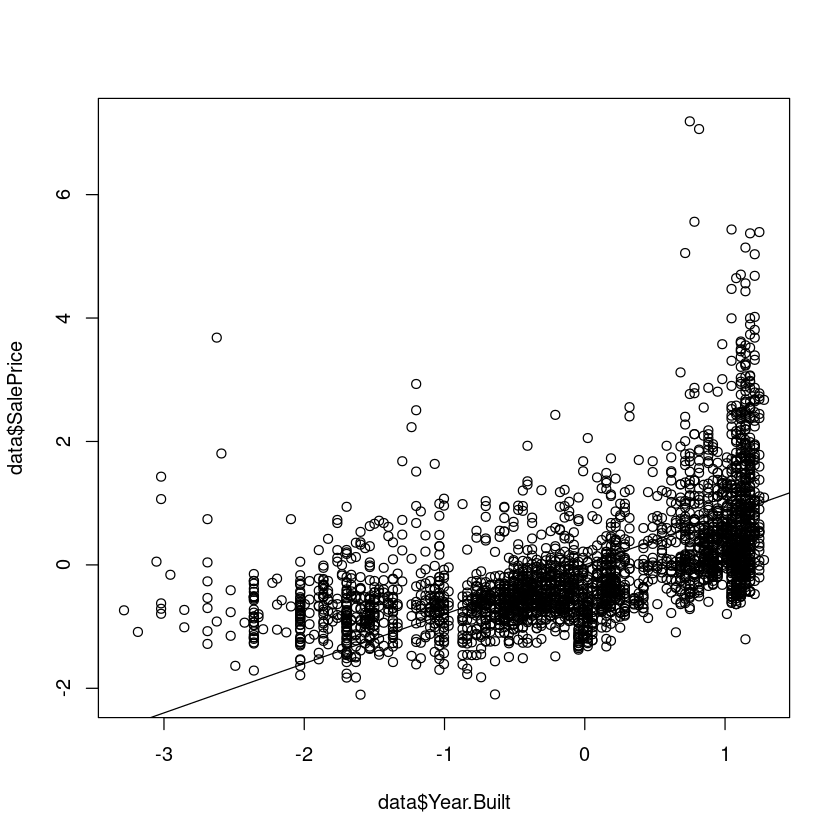

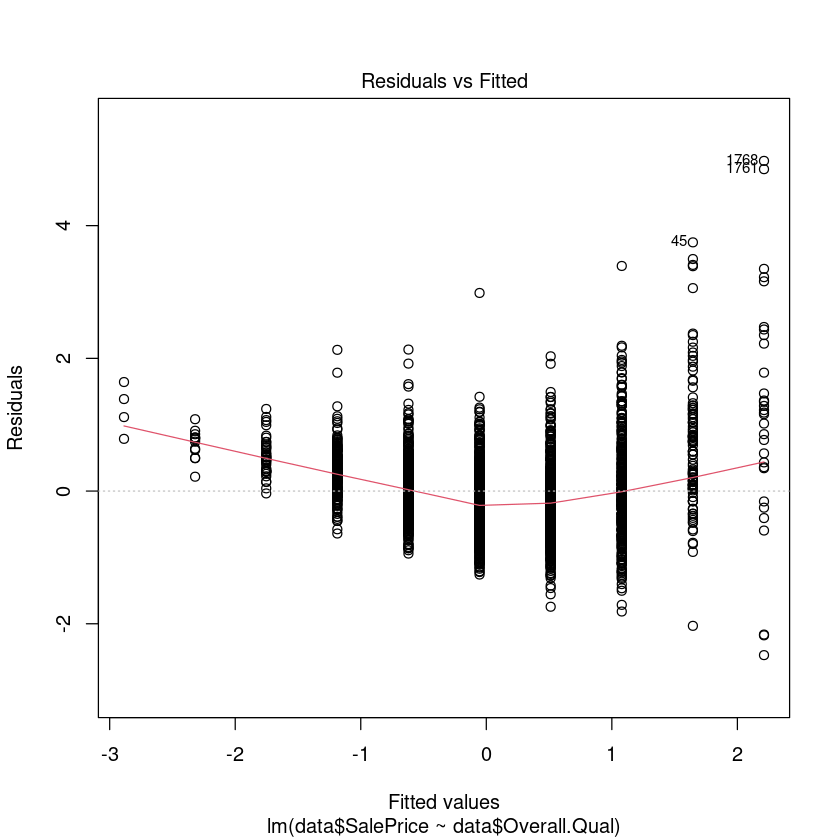

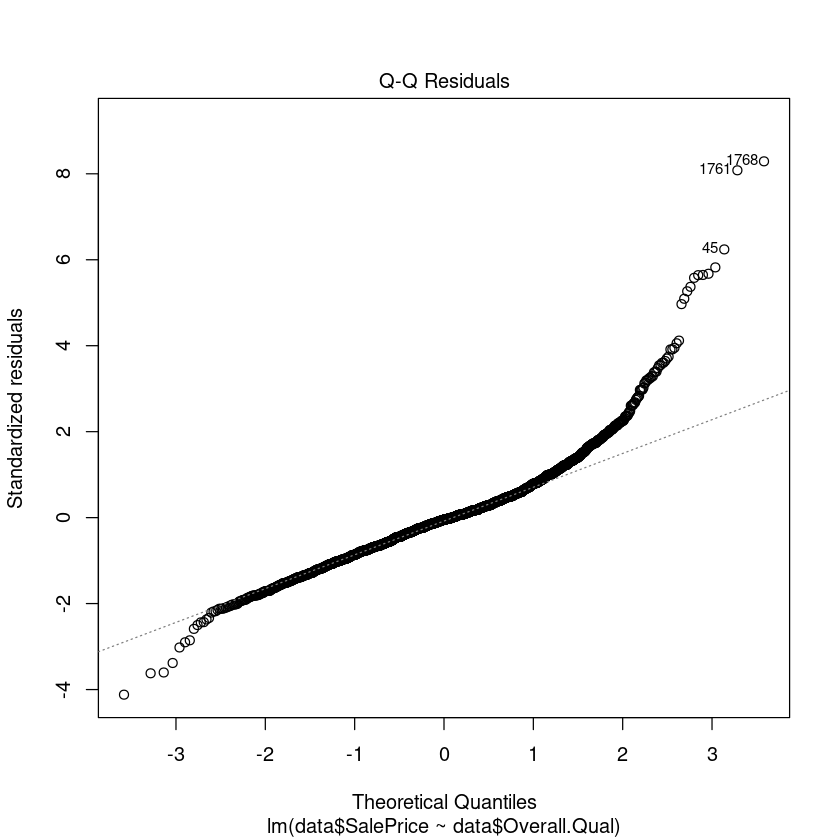

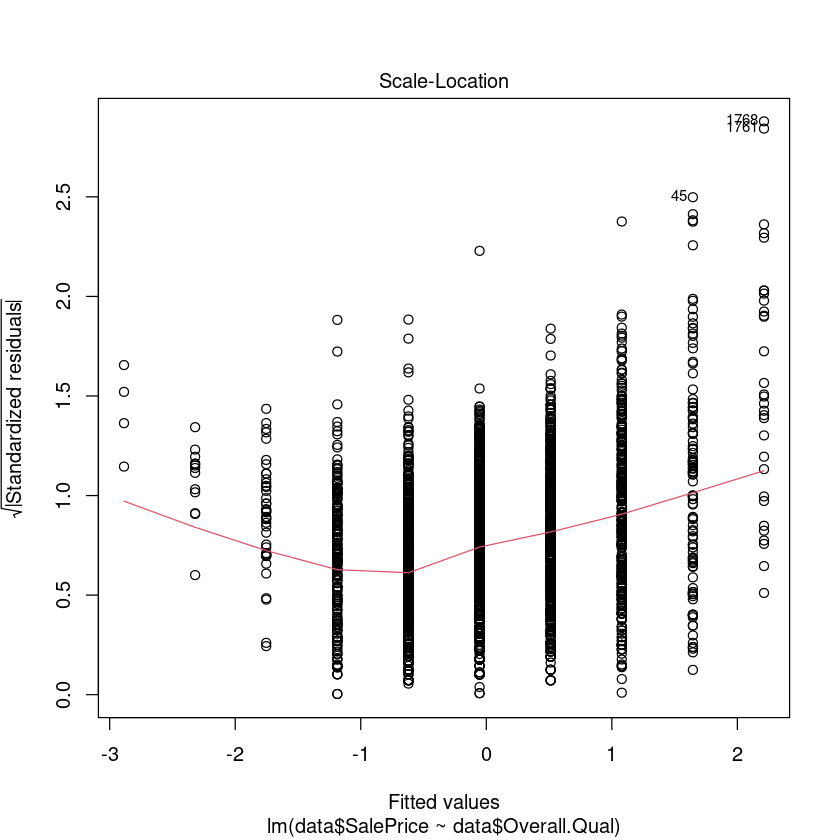

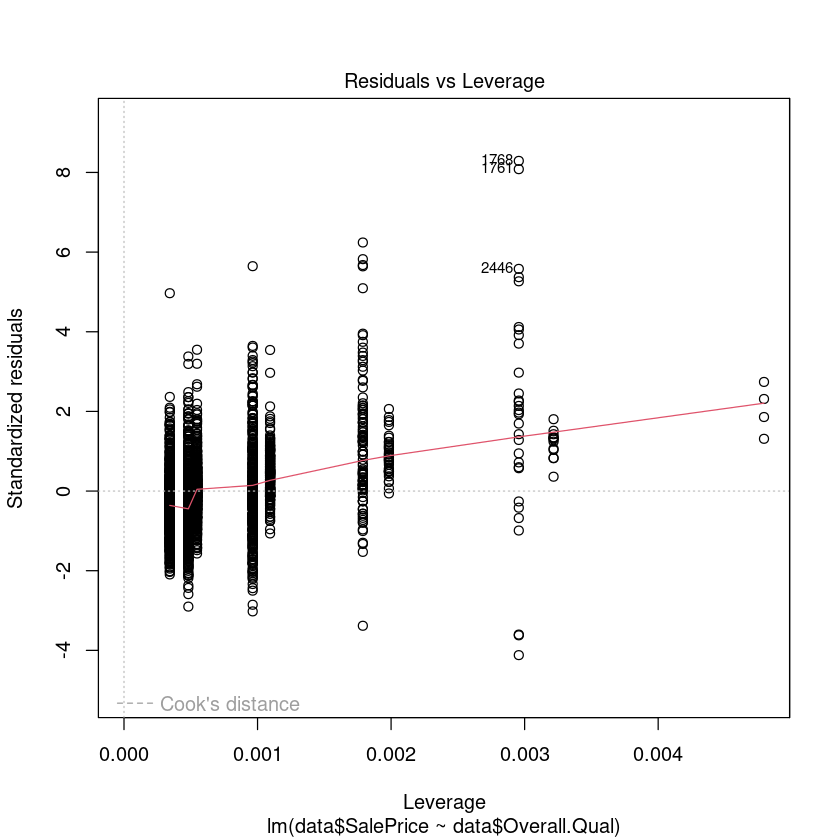

In [32]:
plot(data$Year.Built, data$SalePrice)
abline(fit_simple)
plot(fit_simple)

## Linear Regression for two atributes

In [33]:
fit_og <- lm(data$SalePrice ~ data$Overall.Qual + data$Garage.Cars)
summary(fit_og)


Call:
lm(formula = data$SalePrice ~ data$Overall.Qual + data$Garage.Cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1639 -0.3480 -0.0390  0.2489  4.9856 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -3.962e-16  1.040e-02    0.00        1    
data$Overall.Qual  6.414e-01  1.300e-02   49.35   <2e-16 ***
data$Garage.Cars   2.634e-01  1.300e-02   20.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.563 on 2927 degrees of freedom
Multiple R-squared:  0.6833,	Adjusted R-squared:  0.683 
F-statistic:  3157 on 2 and 2927 DF,  p-value: < 2.2e-16


Model regresji liniowej, uwzględniający zmienne Overall.Qual (ogólna jakość domu) i Garage.Cars (liczba miejsc parkingowych w garażu), okazał się istotny statystycznie i wyjaśniał znaczną część wariancji zmiennej zależnej SalePrice (cena sprzedaży).

## Linear Regression for all atributes

In [34]:
fit_all <- lm(SalePrice ~ ., data = data)
summary(fit_all)


Call:
lm(formula = SalePrice ~ ., data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4525 -0.2659 -0.0286  0.2086  4.6902 

Coefficients: (1 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -0.141533   0.696029  -0.203  0.83888    
Fireplaces             0.123684   0.010354  11.946  < 2e-16 ***
Overall.Cond           0.051770   0.010427   4.965 7.28e-07 ***
MS.SubClass           -0.061701   0.010759  -5.735 1.08e-08 ***
Open.Porch.SF          0.026822   0.009479   2.830  0.00469 ** 
Wood.Deck.SF           0.068817   0.009374   7.341 2.75e-13 ***
Land.SlopeMod          0.226767   0.044037   5.149 2.79e-07 ***
Land.SlopeSev         -0.065281   0.144590  -0.451  0.65167    
Lot.Area               0.088452   0.011411   7.751 1.25e-14 ***
Lot.Frontage           0.053497   0.010976   4.874 1.15e-06 ***
Year.Built             0.089116   0.017610   5.060 4.45e-07 ***
Roof.StyleGable       -0.024080   

Współczynnik determinacji R-kwadrat wynosi 0.7885, co wskazuje na dobrą zdolność modelu do wyjaśniania zmienności cen sprzedaży. Jednak, istnieje wiele zmiennych, dla których wpływ na cenę sprzedaży nie jest istotny statystycznie.

## Linear regression without one atribute

In [35]:
fit_ay <- lm(SalePrice ~ . - Sale.Condition, data = data)
summary(fit_ay)


Call:
lm(formula = SalePrice ~ . - Sale.Condition, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3404 -0.2728 -0.0269  0.2088  4.6563 

Coefficients: (1 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -0.0010249  0.6986353  -0.001  0.99883    
Fireplaces           0.1212664  0.0104060  11.653  < 2e-16 ***
Overall.Cond         0.0533683  0.0104308   5.116 3.32e-07 ***
MS.SubClass         -0.0660429  0.0108114  -6.109 1.14e-09 ***
Open.Porch.SF        0.0281327  0.0095338   2.951  0.00319 ** 
Wood.Deck.SF         0.0642476  0.0094115   6.827 1.06e-11 ***
Land.SlopeMod        0.2241027  0.0442870   5.060 4.45e-07 ***
Land.SlopeSev       -0.0722823  0.1453242  -0.497  0.61895    
Lot.Area             0.0891776  0.0114909   7.761 1.17e-14 ***
Lot.Frontage         0.0547370  0.0110290   4.963 7.35e-07 ***
Year.Built           0.1037648  0.0175940   5.898 4.12e-09 ***
Roof.StyleGable     -0.041963

Wyniki analizy wskazują, że wiele zmiennych ma istotny wpływ na cenę sprzedaży nieruchomości, takie jak liczba kominków, ogólny stan domu, liczba łazienek oraz jakość ogólna. Dopasowany model wyjaśnia około 78.5% zmienności cen sprzedaży, co sugeruje, że jest stosunkowo dobrze dopasowany do danych.

### Zbiór ufności dla dwóch współczynników


Dołączanie pakietu: ‘ellipse’


Następujący obiekt został zakryty z ‘package:graphics’:

    pairs




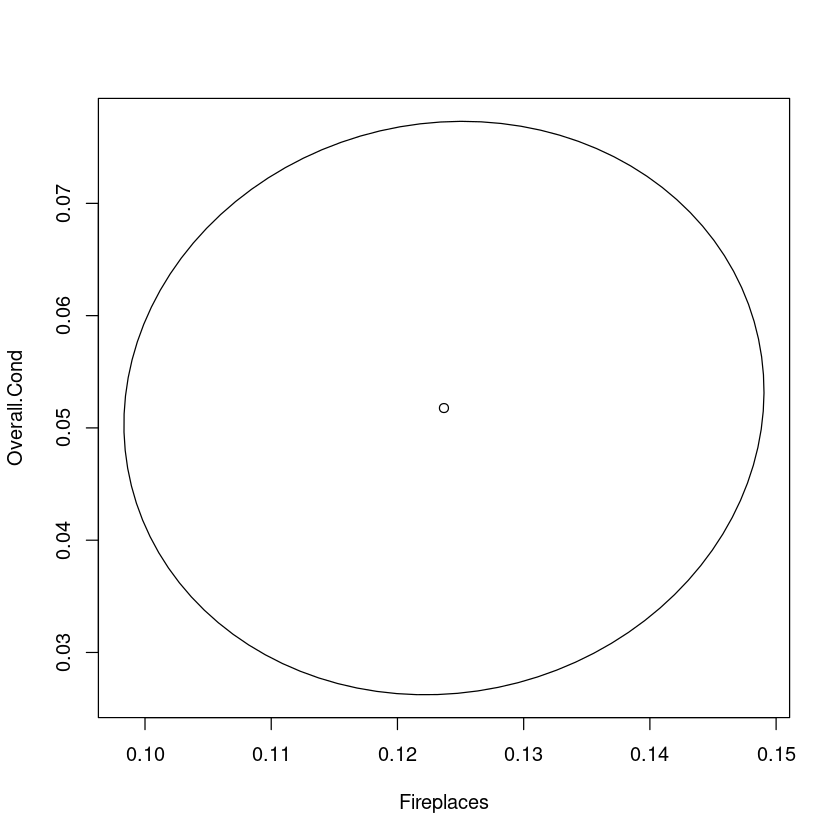

In [36]:
library(ellipse)
plot(ellipse(fit_all, which = -1), type = "l")
la_coefs <- coef(fit_all)
points(la_coefs[2], la_coefs[3])

# Nonlinear predictor transformations

In [37]:
fit_nonlinear <- lm(data$SalePrice ~ data$Overall.Qual + I(data$Overall.Qual ^ 2))
summary(fit_nonlinear)


Call:
lm(formula = data$SalePrice ~ data$Overall.Qual + I(data$Overall.Qual^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4776 -0.3098 -0.0143  0.2569  3.9705 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -0.163863   0.012528  -13.08   <2e-16 ***
data$Overall.Qual       0.768035   0.010335   74.32   <2e-16 ***
I(data$Overall.Qual^2)  0.163919   0.007219   22.71   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5543 on 2927 degrees of freedom
Multiple R-squared:  0.6929,	Adjusted R-squared:  0.6927 
F-statistic:  3302 on 2 and 2927 DF,  p-value: < 2.2e-16


Wyniki przedstawionego modelu regresji liniowej pokazują, że zarówno wartość początkowa (Intercept) jak i współczynniki dla zmiennych data$Overall.Qual oraz I(data$Overall.Qual^2) są statystycznie istotne.

In [38]:
anova(fit_simple, fit_nonlinear)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2928,1057.8979,NA,NA,NA,NA
2,2927,899.4515,1,158.4464,515.6173,2.838619e-105


Wyniki analizy ANOVA pomiędzy modelami fit_simple (prosty model regresji liniowej) i fit_nonlinear (model regresji z dodatkowym składnikiem kwadratowym) wskazują na istotną różnicę między tymi modelami. Wartość p-wartości mniejsza niż 0.05  sugeruje istotność tej różnicy.

## Higher degree polynomial regression

In [39]:
fit_l7 <- lm(data$SalePrice ~ poly(data$Overall.Qual, 7))
summary(fit_l7)


Call:
lm(formula = data$SalePrice ~ poly(data$Overall.Qual, 7))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6357 -0.2999 -0.0359  0.2437  3.8124 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  1.127e-16  1.009e-02   0.000    1.000    
poly(data$Overall.Qual, 7)1  4.326e+01  5.464e-01  79.163  < 2e-16 ***
poly(data$Overall.Qual, 7)2  1.259e+01  5.464e-01  23.036  < 2e-16 ***
poly(data$Overall.Qual, 7)3  4.508e+00  5.464e-01   8.250 2.37e-16 ***
poly(data$Overall.Qual, 7)4 -7.314e-01  5.464e-01  -1.339    0.181    
poly(data$Overall.Qual, 7)5 -2.335e+00  5.464e-01  -4.272 2.00e-05 ***
poly(data$Overall.Qual, 7)6 -7.877e-01  5.464e-01  -1.442    0.150    
poly(data$Overall.Qual, 7)7 -2.950e-01  5.464e-01  -0.540    0.589    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5464 on 2922 degrees of freedom
Multiple R-squared:  0.7021,	Adjusted R-squared:  0.7014 
F-

Wyższe stopnie wielomianu (4, 6 i 7) nie są istotne, co sugeruje, że dodatkowe składniki nieznacznie wpływają na model.

## Logarithmic transformation of the predictor

In [40]:
summary(lm(data$SalePrice ~ log(data$Overall.Qual)))

Warning message in log(data$Overall.Qual):
“wyprodukowano wartości NaN”



Call:
lm(formula = data$SalePrice ~ log(data$Overall.Qual))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7970 -0.4511 -0.0852  0.3814  4.6511 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.93324    0.02336   39.95   <2e-16 ***
log(data$Overall.Qual)  1.57510    0.04997   31.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7669 on 1088 degrees of freedom
  (1840 obserwacji zostało skasowanych z uwagi na braki w nich zawarte)
Multiple R-squared:  0.4773,	Adjusted R-squared:  0.4768 
F-statistic: 993.5 on 1 and 1088 DF,  p-value: < 2.2e-16


Wyniki pokazały, że istnieje statystycznie istotna zależność między logarytmem wartości Overall.Qual a SalePrice. Wartość współczynnika nachylenia wynosi 1.57510, co oznacza, że każdy jednostkowy wzrost logarytmu Overall.Qual jest powiązany z przewidywanym wzrostem wartości SalePrice o 1.57510 jednostek.

# Quality predictors

In [16]:
sales_all_fit <- lm(SalePrice ~ . , data = data)
summary(sales_all_fit)

In [111]:
contrasts(factor(data$Roof.Style))

,Gable,Gambrel,Hip,Mansard,Shed
Flat,0,0,0,0,0
Gable,1,0,0,0,0
Gambrel,0,1,0,0,0
Hip,0,0,1,0,0
Mansard,0,0,0,1,0
Shed,0,0,0,0,1


# Logistic Regresion

In [42]:
# Convert column to binary 
data$Central.AirT <- ifelse(data$Central.Air == "Y", 1, 0)

In [43]:
dir_logistic <- list()
dir_logistic$fit <-  glm(Central.AirT ~ Overall.Qual, data=data, family=binomial)
summary(dir_logistic$fit)


Call:
glm(formula = Central.AirT ~ Overall.Qual, family = binomial, 
    data = data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.3969     0.1219   27.87   <2e-16 ***
Overall.Qual   1.4664     0.1048   13.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1438.8  on 2929  degrees of freedom
Residual deviance: 1164.7  on 2928  degrees of freedom
AIC: 1168.7

Number of Fisher Scoring iterations: 6


Wyniki wskazują, że zarówno wartość Intercept jak i współczynnik Overall.Qual są istotne statystycznie, co sugeruje, że ogólna jakość nieruchomości ma wpływ na obecność centralnej klimatyzacji. Oszacowane wartości współczynników wskazują, że zwiększenie wartości Overall.Qual o jeden punkt powoduje wzrost logarytmu szans obecności centralnej klimatyzacji o około 1.4664.

## Prediction

In [44]:
dir_logistic$probs <- predict(dir_logistic$fit, type = "response")
head(dir_logistic$probs)
length(dir_logistic$probs)

1         2         3         4         5         6 
0.9643718 0.9054297 0.9643718 0.9871009 0.9054297 0.9643718

[1] 2930

Wyniki przedstawiają prawdopodobieństwo, które wskazują na szanse lub stopień pewności, z jakim dany obiekt został przyporządkowany do danej kategorii przez model regresji logistycznej.

In [50]:
dir_logistic$predicted <- ifelse(dir_logistic$probs > 0.5, "Y", "N")

In [51]:
dir_logistic$cm <- table(dir_logistic$predicted, data$Central.AirT)
dir_logistic$cm

   
       0    1
  N   14    3
  Y  182 2731

## Proporcja błędów

In [54]:
mean(dir_logistic$predicted != data$Central.Air)

[1] 0.06313993

## Test and training set

In [85]:
library(caret)
set.seed(123)  
train <- createDataPartition(data$Central.AirT, p = 0.6, list = FALSE)
df_test <- data[-train, ]
Central.AirT_test <- data$Central.AirT[-train]

In [89]:
dir_log_t <- list()
dir_log_t$fit <-glm(Central.AirT ~ Overall.Qual, data=data, family=binomial, subset = train)  
summary(dir_log_t$fit)


Call:
glm(formula = Central.AirT ~ Overall.Qual, family = binomial, 
    data = data, subset = train)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)    3.3718     0.1567   21.51   <2e-16 ***
Overall.Qual   1.5445     0.1361   11.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 922.22  on 1757  degrees of freedom
Residual deviance: 732.64  on 1756  degrees of freedom
AIC: 736.64

Number of Fisher Scoring iterations: 6


In [90]:
dir_log_t$probs <- predict(dir_log_t$fit, df_test, type = "response")
dir_log_t$predicted <- ifelse(dir_log_t$probs > 0.5, 1, 0)
table(dir_log_t$predicted, Central.AirT_test)

   Central.AirT_test
       0    1
  0   12   10
  1   55 1095

In [91]:
mean(dir_log_t$predicted != Central.AirT_test)

[1] 0.05546075

In [64]:
dir_log_t <- list()
dir_log_t$fit <-glm(Central.AirT ~ Overall.Qual + Full.Bath + Half.Bath + Paved.Drive, data=data, family=binomial, subset = train)
dir_log_t$probs <- predict(dir_log_t$fit, df_test, type = "response")
dir_log_t$predicted <- ifelse(dir_log_t$probs > 0.5, 1, 0)
table(dir_log_t$predicted, Central.AirT_test)

   Central.AirT_test
       0    1
  0   18   14
  1   49 1091

In [65]:
mean(dir_log_t$predicted != Central.AirT_test)

[1] 0.05375427

In [66]:
dir_log_t <- list()
dir_log_t$fit <-glm(Central.AirT ~ Overall.Qual + Paved.Drive, data=data, family=binomial, subset = train)

dir_log_t$probs <- predict(dir_log_t$fit, df_test, type = "response")
dir_log_t$predicted <- ifelse(dir_log_t$probs > 0.5, 1, 0)
table(dir_log_t$predicted, Central.AirT_test)

   Central.AirT_test
       0    1
  0    8    1
  1   59 1104

In [67]:
mean(dir_log_t$predicted != Central.AirT_test)

[1] 0.05119454

W porównaniu z naiwną strategią przewidującą zawsze wzrost, proporcja błędów dla modelu regresji logistycznej w ostatniej tabeli jest wyższa, co oznacza, że model jest bardziej dokładny w klasyfikacji przypadków dotyczących centralnej klimatyzacji.

In [68]:
mean(Central.AirT_test != "Y")

[1] 1

Można zauważyć, że model ma tendencję do lepszego przewidywania obecności centralnej klimatyzacji niż jej braku, co jest wskazane przez niewielką wartość błędu. Zatem strategią inwestycyjną mogłoby być inwestowanie w nieruchomości, które model sklasyfikował jako posiadające centralną klimatyzację, zakładając, że centralna klimatyzacja może wpływać na wartość nieruchomości.

## LDA

In [96]:
library(MASS)

In [97]:
dir_lda <- list()
dir_lda$fit <- lda(Central.AirT ~ Overall.Qual + Paved.Drive, data = data, subset = train)
dir_lda$fit

Call:
lda(Central.AirT ~ Overall.Qual + Paved.Drive, data = data, subset = train)

Prior probabilities of groups:
         0          1 
0.07337884 0.92662116 

Group means:
  Overall.Qual Paved.DriveP Paved.DriveY
0  -1.10557618   0.05426357    0.5348837
1   0.07110516   0.01780233    0.9300184

Coefficients of linear discriminants:
                   LD1
Overall.Qual 0.5671109
Paved.DriveP 1.6823568
Paved.DriveY 2.8264671

In [104]:
dir_lda$predicted <- predict(dir_lda$fit, df_test)
table(dir_lda$predicted$class, Central.AirT_test)

   Central.AirT_test
       0    1
  0   33   44
  1   34 1061

Analizując poszczególne wyniki można dojść do wniosku, że regresja logistyczna lepiej dopasowała się do sytuacji kiedy przewidywaną klasą jest posiadanie centralnej klimatyzacji, natomiast nie radziło sobie z brakiem centralnej klimatyzacji. LDA lepiej rozłożyło błędy, przez co lepiej dopasowało się do tego zadania.

## QDA

In [267]:
dir_qda <- list()
dir_qda$fit <- qda(Central.AirT ~ Overall.Qual + Paved.Drive, data = data)
dir_qda$fit

Call:
qda(Central.AirT ~ Overall.Qual + Paved.Drive, data = data)

Prior probabilities of groups:
        0         1 
0.0668942 0.9331058 

Group means:
  Overall.Qual Paved.DriveP Paved.DriveY
0   -1.0724450   0.06122449    0.5000000
1    0.0768834   0.01828822    0.9341624

In [268]:
dir_qda$predicted <- predict(dir_qda$fit, df_test)
table(dir_qda$predicted$class, Central.AirT_test)

   Central.AirT_test
       0    1
  0   38   66
  1   29 1039

W tym przypadku uzyskany wynik dla sytuacji kiedy poszukiwaną klasą jest brak centralnej klimatyzacji jest jeszcze lepszy niż poprzednio, niestety następuje lekki spadek skuteczności w rozpoznawaniu klasy mówiącej o posiadaniu centralnej klimatyzacji. Biorąc pod uwagę stostunkowo duży wzrost skuteczności w przypadku klasy 0 oraz stosunkowo mały spadek w przypadku klasy 1, lepszym wyborem w przypadku tego zbioru danych może okazać się QDA.

## KNN

$k$ = 1

In [304]:
train_set <- data[train, c("Overall.Qual", "Garage.Cars")]
test_set <- data[-train, c("Overall.Qual", "Garage.Cars")]
Central.AirT_train <- data$Central.AirT[train]
air_knn_1 <- knn(train_set, test_set, Central.AirT_train, k = 1)
table(air_knn_1, Central.AirT_test)

         Central.AirT_test
air_knn_1    0    1
        0    5    5
        1   62 1100

$k$ = 3

In [308]:
train_set <- data[train, c("Overall.Qual", "Garage.Cars")]
test_set <- data[-train, c("Overall.Qual", "Garage.Cars")]
Central.AirT_train <- data$Central.AirT[train]
air_knn_1 <- knn(train_set, test_set, Central.AirT_train, k = 3)
table(air_knn_1, Central.AirT_test)

         Central.AirT_test
air_knn_1    0    1
        0    5    5
        1   62 1100

$k$ = 7

In [313]:
train_set <- data[train, c("Overall.Qual", "Garage.Cars")]
test_set <- data[-train, c("Overall.Qual", "Garage.Cars")]
Central.AirT_train <- data$Central.AirT[train]
air_knn_1 <- knn(train_set, test_set, Central.AirT_train, k = 7)
table(air_knn_1, Central.AirT_test)

         Central.AirT_test
air_knn_1    0    1
        0    2    2
        1   65 1103

Wyniki dla $k$ = 1 nie są zadowalające, jednak zwiększanie tego parametru nie skutkuje podniesieniem skuteczności klasyfikacji, co może być spowodowane nierównomiernym rozłożeniem klas. 

# Cross-validation

In [284]:
set.seed(1)
n <- nrow(df)
train <- sample(n, n / 2)

In [285]:
df_lm <- lm(SalePrice ~ Overall.Qual, data = df, subset = train)
validation_set <- df[-train,]
mse <- mean((validation_set$SalePrice - predict(df_lm, validation_set))^2)
mse

[1] 0.3338743

In [286]:
for (i in 2:5) {
  df_lm_poly <- lm(SalePrice ~ poly(Overall.Qual, degree = i), data = df, 
                     subset = train)
  print(mean((validation_set$SalePrice - predict(df_lm_poly, validation_set))^2))
}

[1] 0.2895448
[1] 0.2865232
[1] 0.2864369
[1] 0.2861335


In [287]:
set.seed(3)
train <- sample(n, n / 2)
validation_set <- df[-train,]
degree_max <- 5
mse <- rep(0, times = degree_max)
for (i in 1:degree_max) {
  df_lm <- lm(SalePrice ~ poly(Overall.Qual, degree = i), data = df, subset = train)
  mse[i] <- mean((validation_set$SalePrice - predict(df_lm, validation_set))^2)
}
mse

[1] 0.3346876 0.2947064 0.2927172 0.2938534 0.2899133

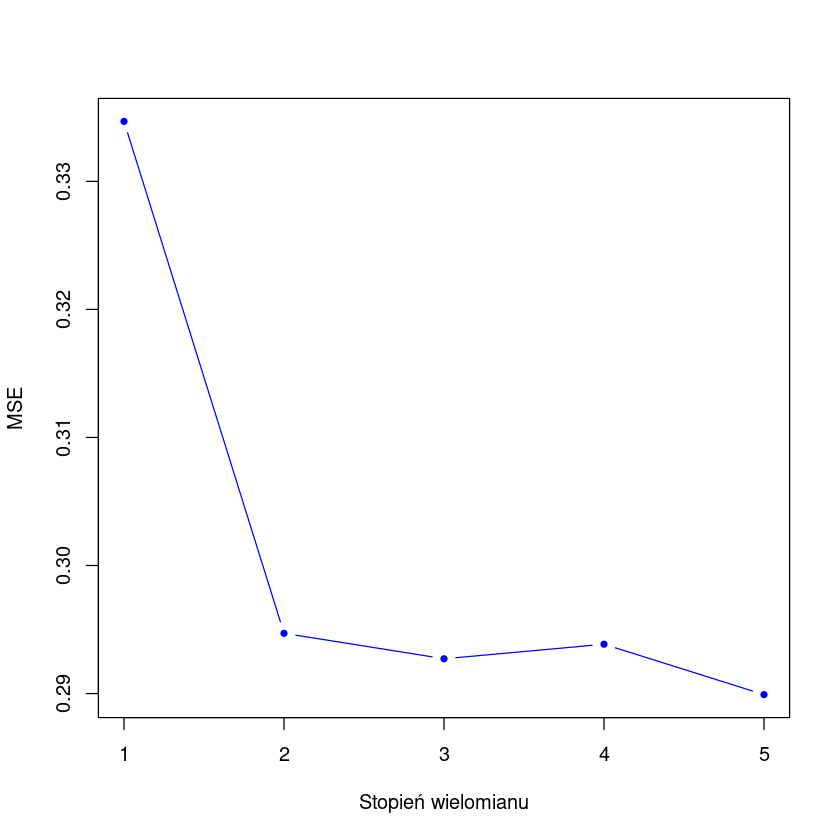

In [289]:
plot(mse, xlab = "Stopień wielomianu", ylab = "MSE", type = "b", pch = 20, col = "blue")


## leave-one-out

In [293]:
library(boot)
degree_max <- 5
compute_loocv_mse <- function(degree) {
  df_glm <- glm(SalePrice ~ poly(Overall.Qual, degree), data = df)
  cv.glm(df, df_glm)$delta[1]
}
mse <- vapply(1:degree_max, compute_loocv_mse, FUN.VALUE = numeric(1))
mse



Dołączanie pakietu: ‘boot’


Następujący obiekt został zakryty z ‘package:lattice’:

    melanoma




[1] 0.3618995 0.3083176 0.3019796 0.3025238 0.3010403

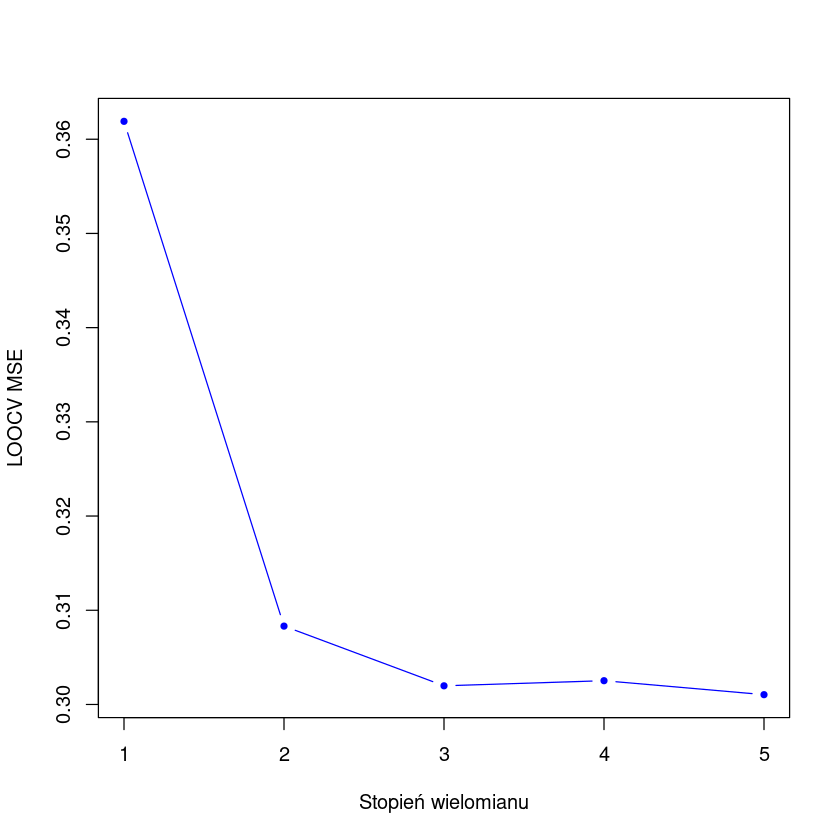

In [294]:
plot(mse, xlab = "Stopień wielomianu", ylab = "LOOCV MSE", type = "b", pch = 20,col = "blue")

## k-fold cross-validation

In [316]:
degree_max <- 5
compute_kcv_mse <- function(degree, k) {
  df_glm <- glm(SalePrice ~ poly(Overall.Qual, degree), data = df)
  cv.glm(df, df_glm, K = k)$delta[1]
}
mse <- vapply(1:degree_max, compute_kcv_mse, k = 10, FUN.VALUE = numeric(1))
mse


[1] 0.3617827 0.3076879 0.3013256 0.3018547 0.3013874

In [317]:
mse10 <- replicate(10, sapply(1:degree_max, compute_kcv_mse, k = 10))
mse10

0.3619724,0.3617700,0.3617764,0.3620894,0.3620441,0.3616893,0.3626327,0.3625503,0.3618644,0.3617254
0.3079264,0.3082327,0.3076876,0.3081004,0.3088764,0.3088206,0.3080605,0.3084135,0.3077763,0.3080118
0.3017373,0.3018154,0.3027930,0.3044157,0.3021121,0.3016064,0.3014472,0.3011946,0.3029549,0.3024249
0.3043953,0.3034133,0.3007152,0.3038101,0.3020246,0.3017359,0.3021366,0.3022278,0.3051036,0.3014181
0.3039306,0.3005193,0.3011531,0.3014606,0.3004754,0.3000391,0.3010427,0.3011131,0.3001973,0.3006149


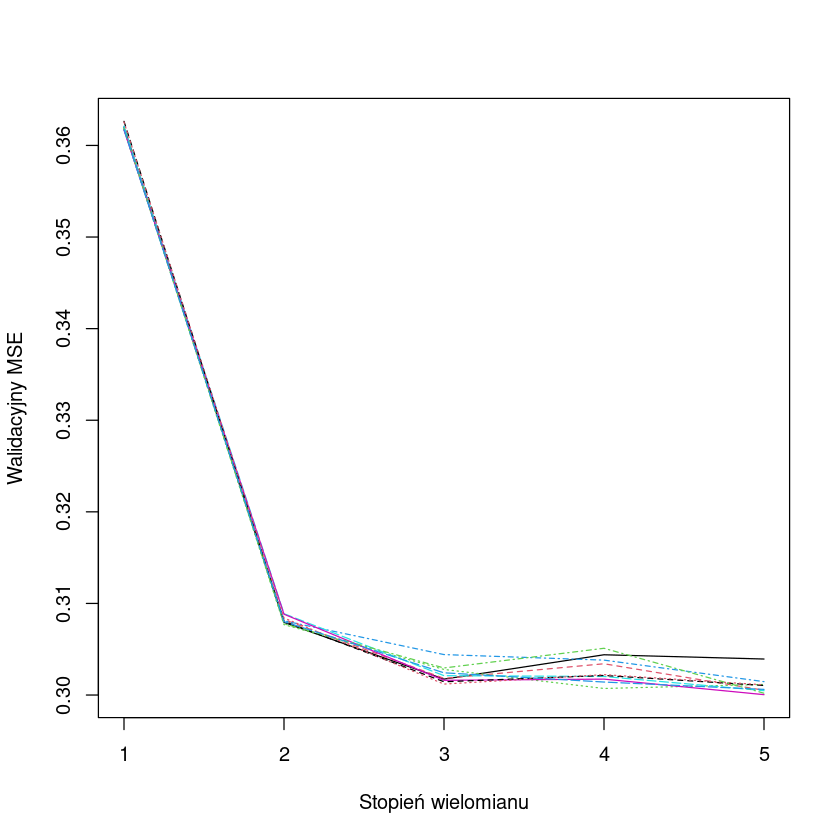

In [318]:
matplot(mse10, pch = 20, type = "l", xlim = c(1, degree_max),
        xlab = "Stopień wielomianu", ylab = "Walidacyjny MSE")

## Bootstrap

### Linear regression

In [325]:
lm_coefs <- function(data, index = 1:nrow(data)) {
  coef(lm(SalePrice ~ Overall.Qual, data = data, subset = index))
}

In [326]:
n <- nrow(data)
lm_coefs(data, sample(n, n, replace = TRUE))

(Intercept)  Overall.Qual 
-0.0001286664  0.7824924539

In [327]:
lm_coefs(data)

(Intercept)  Overall.Qual 
-1.606469e-16  7.992618e-01

In [328]:
boot(data, lm_coefs, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = lm_coefs, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1* -1.606469e-16 -0.0004288843  0.01085708
t2*  7.992618e-01 -0.0002889950  0.01799087

### Quadratic regression

In [329]:
lm_coefs2 <- function(data, index = 1:nrow(data)) {
  coef(lm(data$SalePrice ~ data$Overall.Qual + I(data$Overall.Qual ^ 2)))
}

In [330]:
n <- nrow(df)
lm_coefs(data, sample(n, n, replace = TRUE))

(Intercept) Overall.Qual 
 0.006153684  0.810348226

In [331]:
lm_coefs(data)

(Intercept)  Overall.Qual 
-1.606469e-16  7.992618e-01

In [332]:
boot(data, lm_coefs2, R = 1000)


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data, statistic = lm_coefs2, R = 1000)


Bootstrap Statistics :
      original  bias    std. error
t1* -0.1638629       0           0
t2*  0.7680346       0           0
t3*  0.1639189       0           0

# Selekcja cech 

## Selekcja najlepszego podzbioru

In [146]:
nvmax <- 17
data_bs <- regsubsets(SalePrice ~ ., data = data, nvmax = nvmax)
data_bs_sum <- summary(data_bs)
data_bs_sum

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data, nvmax = nvmax)
16 Variables  (and intercept)
              Forced in Forced out
Fireplaces        FALSE      FALSE
Overall.Cond      FALSE      FALSE
MS.SubClass       FALSE      FALSE
Open.Porch.SF     FALSE      FALSE
Wood.Deck.SF      FALSE      FALSE
Lot.Area          FALSE      FALSE
Lot.Frontage      FALSE      FALSE
Year.Built        FALSE      FALSE
Full.Bath         FALSE      FALSE
Half.Bath         FALSE      FALSE
Bedroom.AbvGr     FALSE      FALSE
Kitchen.AbvGr     FALSE      FALSE
Garage.Area       FALSE      FALSE
Yr.Sold           FALSE      FALSE
Garage.Cars       FALSE      FALSE
Overall.Qual      FALSE      FALSE
1 subsets of each size up to 16
Selection Algorithm: exhaustive
          Fireplaces Overall.Cond MS.SubClass Open.Porch.SF Wood.Deck.SF
1  ( 1 )  " "        " "          " "         " "           " "         
2  ( 1 )  " "        " "          " "         " "           " "         


### BIC

[1] 12

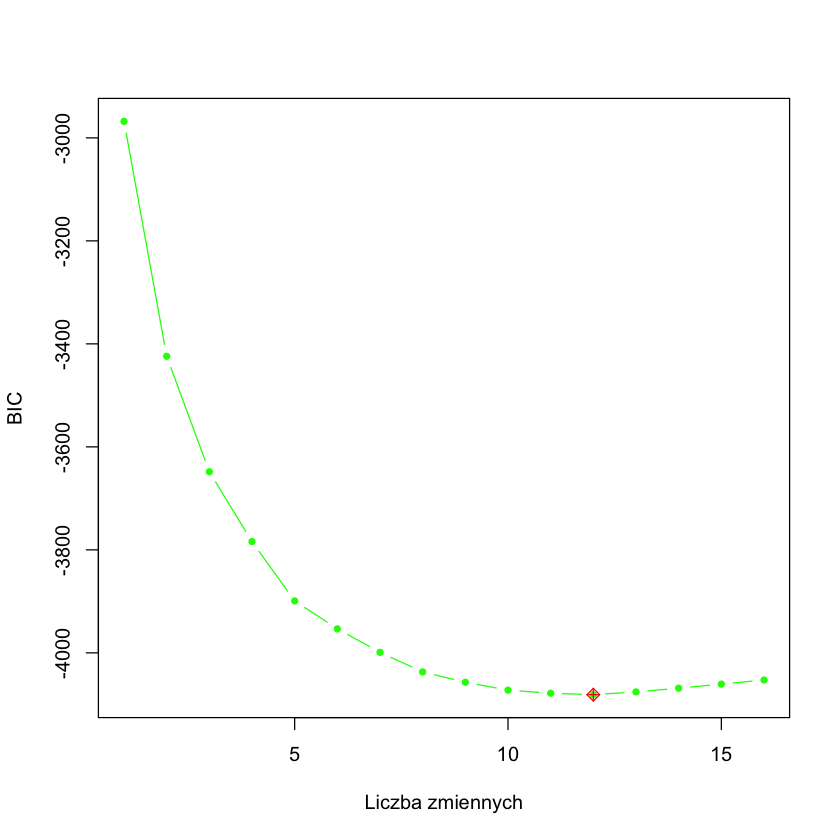

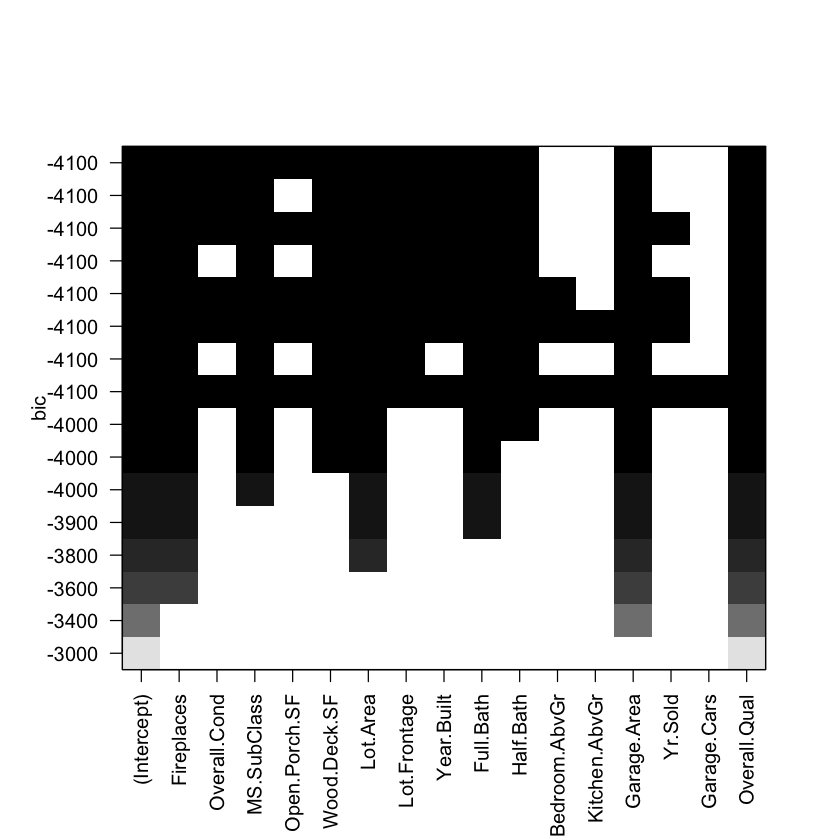

In [147]:
bic_min <- which.min(data_bs_sum$bic)
bic_min
plot(data_bs_sum$bic, xlab = "Liczba zmiennych", ylab = "BIC", col = "green",
     type = "b", pch = 20)
points(bic_min, data_bs_sum$bic[bic_min], col = "red", pch = 9)
plot(data_bs, scale="bic")

### Cp

[1] 13

[1] 11.83225

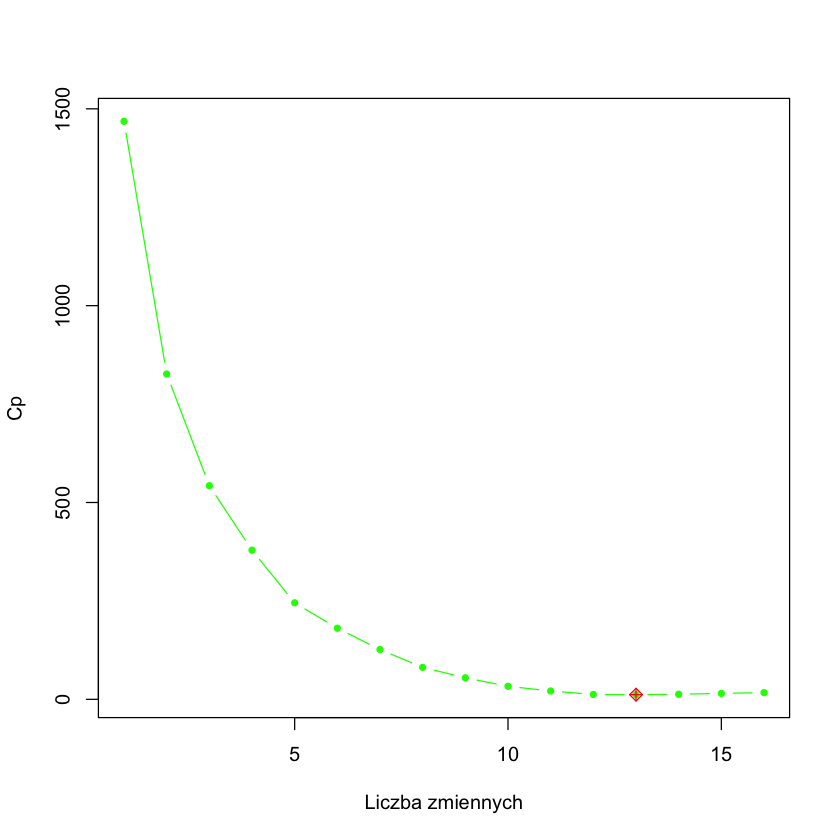

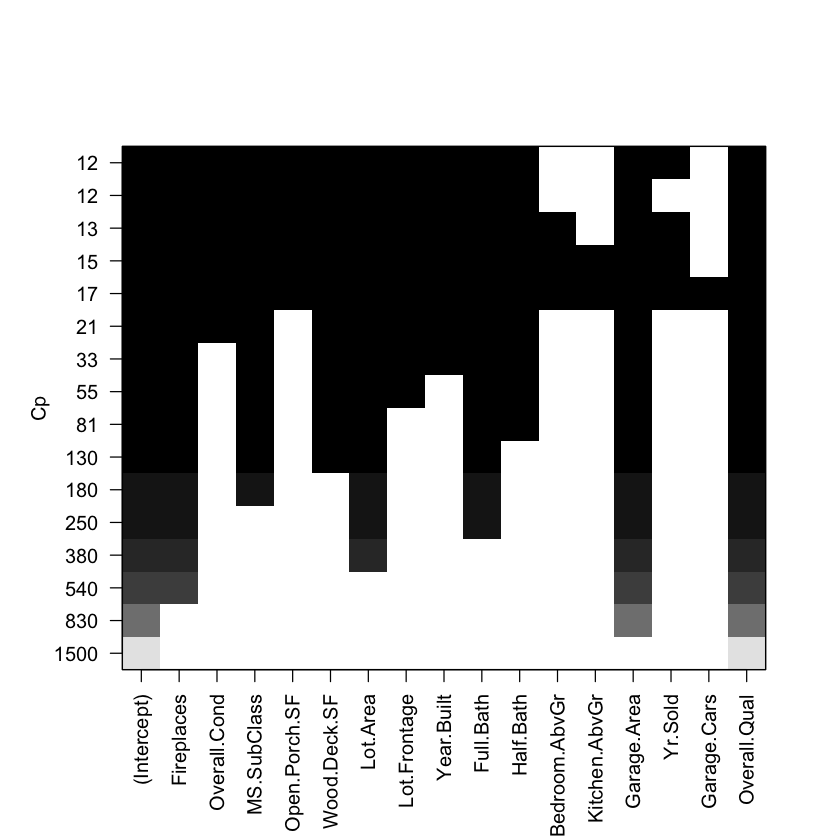

In [153]:
cp_min = which.min(data_bs_sum$cp)
cp_min
data_bs_sum$cp[cp_min]

plot(data_bs_sum$cp, xlab = "Liczba zmiennych", ylab = "Cp", col = "green",
     type = "b", pch = 20)
points(cp_min, data_bs_sum$cp[cp_min], col = "red", pch = 9)

plot(data_bs, scale="Cp")

### R^2

[1] 13

[1] 0.7594329

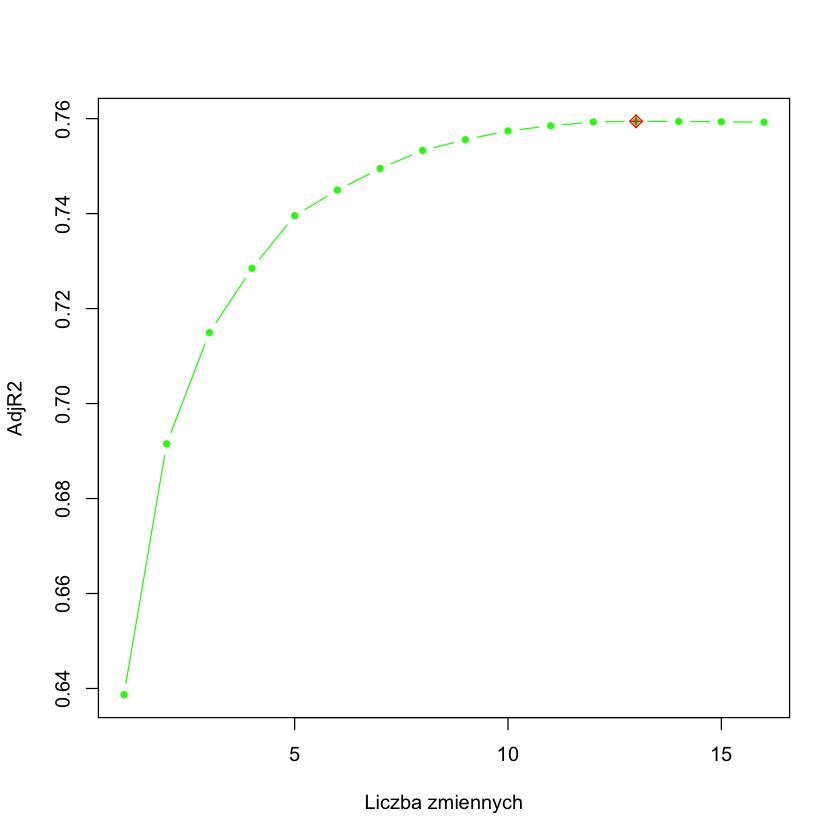

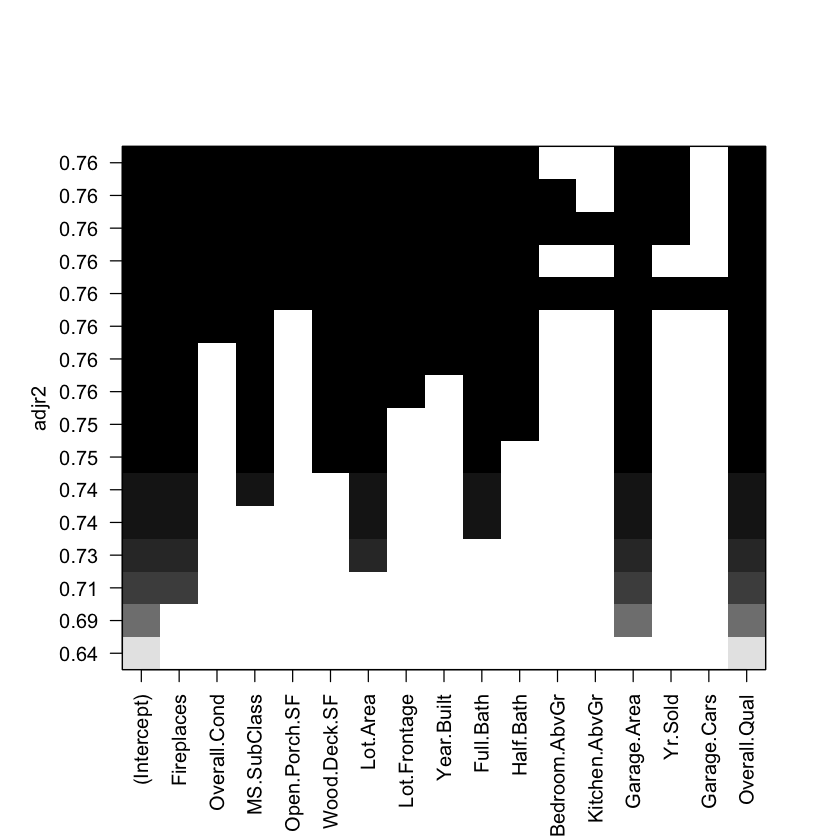

In [154]:
adjr2_max = which.max(data_bs_sum$adjr2)
adjr2_max
data_bs_sum$adjr2[adjr2_max]

plot(data_bs_sum$adjr2, xlab = "Liczba zmiennych", ylab = "AdjR2", col = "green",
     type = "b", pch = 20)
points(adjr2_max, data_bs_sum$adjr2[adjr2_max], col = "red", pch = 9)

plot(data_bs, scale="adjr2")

## Selekcja krokowa do przodu i wstecz

In [155]:
features_fwd <- regsubsets(SalePrice ~ ., data = data, nvmax=nvmax, method="forward")
features_bwd <- regsubsets(SalePrice ~ ., data = data, nvmax=nvmax, method="backward")
features_fwd_sum = summary(features_fwd)
features_bwd_sum = summary(features_bwd)

### Metoda backward

In [164]:
features_bwd_sum

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data, nvmax = nvmax, 
    method = "backward")
16 Variables  (and intercept)
              Forced in Forced out
Fireplaces        FALSE      FALSE
Overall.Cond      FALSE      FALSE
MS.SubClass       FALSE      FALSE
Open.Porch.SF     FALSE      FALSE
Wood.Deck.SF      FALSE      FALSE
Lot.Area          FALSE      FALSE
Lot.Frontage      FALSE      FALSE
Year.Built        FALSE      FALSE
Full.Bath         FALSE      FALSE
Half.Bath         FALSE      FALSE
Bedroom.AbvGr     FALSE      FALSE
Kitchen.AbvGr     FALSE      FALSE
Garage.Area       FALSE      FALSE
Yr.Sold           FALSE      FALSE
Garage.Cars       FALSE      FALSE
Overall.Qual      FALSE      FALSE
1 subsets of each size up to 16
Selection Algorithm: backward
          Fireplaces Overall.Cond MS.SubClass Open.Porch.SF Wood.Deck.SF
1  ( 1 )  " "        " "          " "         " "           " "         
2  ( 1 )  " "        " "          " "         " "

#### Najlepszy podzbiór wg. kryterium BIC

In [156]:
bic_min <- which.min(features_bwd_sum$bic)
bic_min

[1] 12

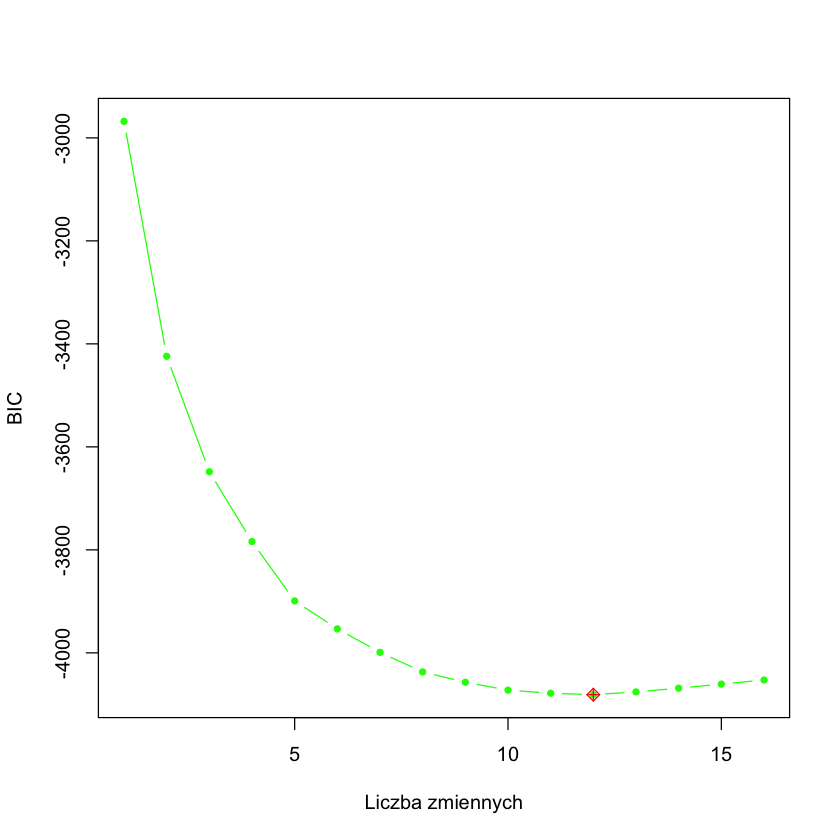

In [157]:
plot(features_bwd_sum$bic, xlab = "Liczba zmiennych", ylab = "BIC", col = "green",
     type = "b", pch = 20)
points(bic_min, features_bwd_sum$bic[bic_min], col = "red", pch = 9)

Najlepsza ilość zmiennych na podstawie kryterium BIC to 14

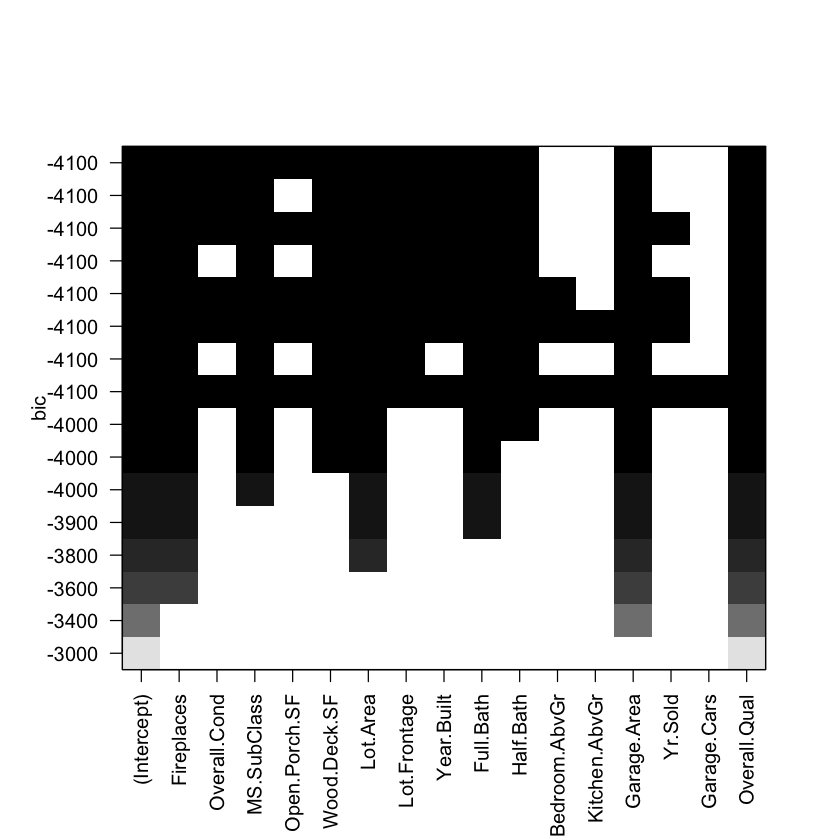

In [158]:
plot(features_bwd, scale="bic")

#### Najlepszy podzbiór wg. kryterium Cp

[1] 13

[1] 11.83225

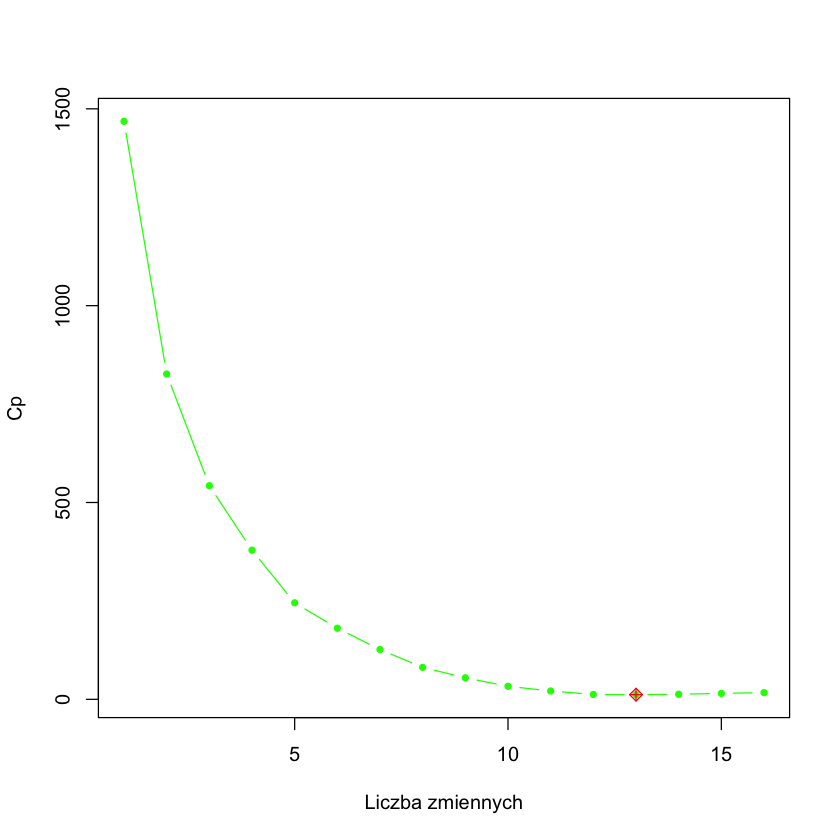

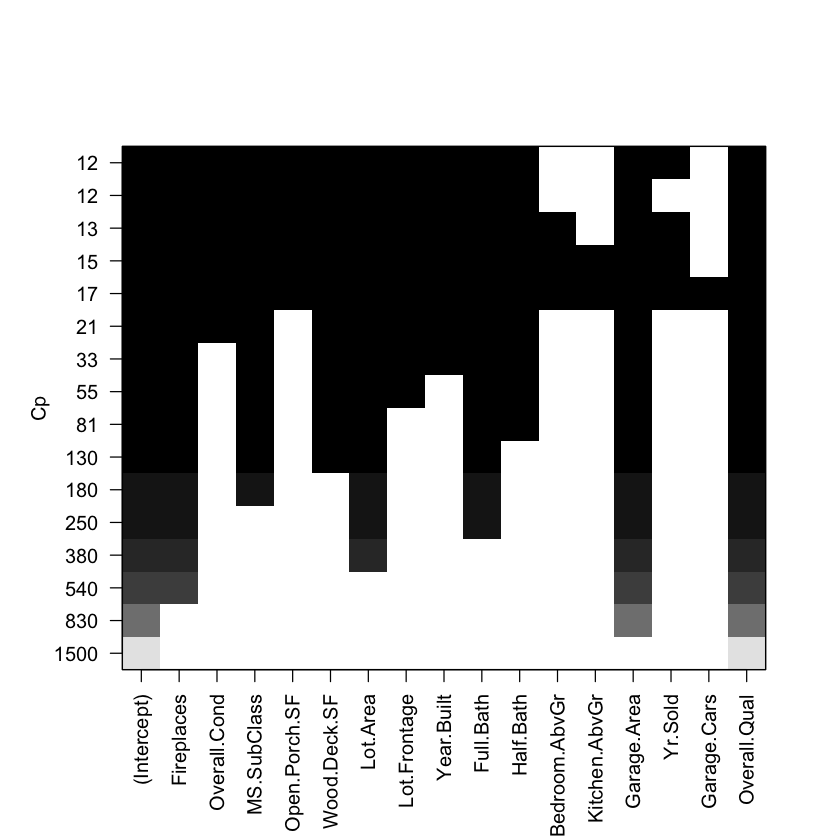

In [159]:
cp_min = which.min(features_bwd_sum$cp)
cp_min
features_bwd_sum$cp[cp_min]

plot(features_bwd_sum$cp, xlab = "Liczba zmiennych", ylab = "Cp", col = "green",
     type = "b", pch = 20)
points(cp_min, features_bwd_sum$cp[cp_min], col = "red", pch = 9)

plot(features_bwd, scale="Cp")

#### Najlepszy podzbiór wg. kryterium poprawionego R^2

[1] 13

[1] 0.7594329

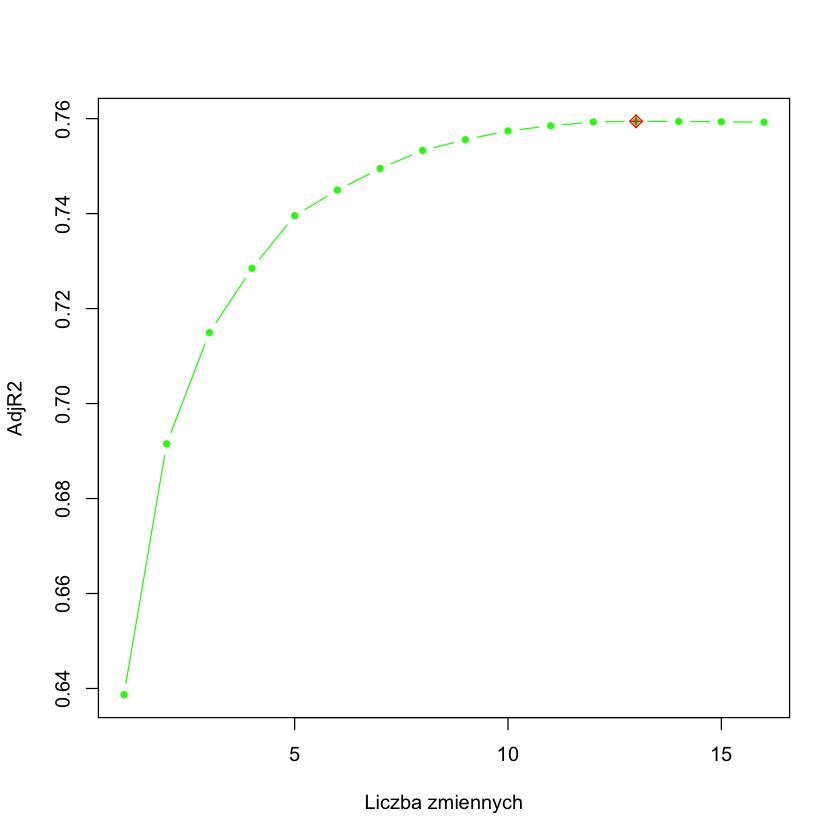

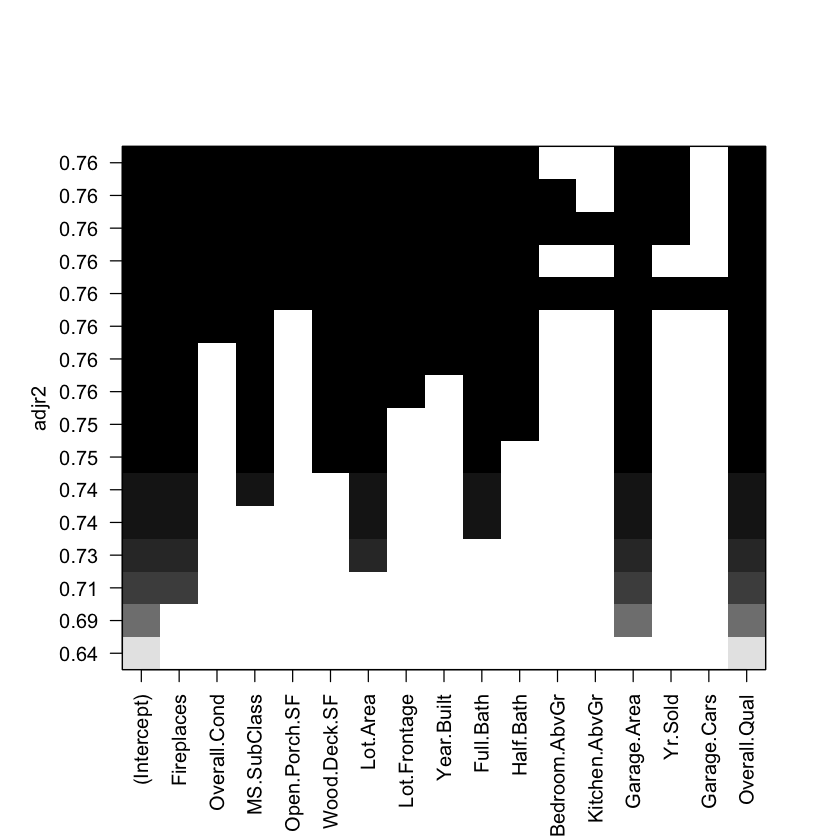

In [160]:
adjr2_max = which.max(features_bwd_sum$adjr2)
adjr2_max
features_bwd_sum$adjr2[adjr2_max]

plot(features_bwd_sum$adjr2, xlab = "Liczba zmiennych", ylab = "AdjR2", col = "green",
     type = "b", pch = 20)
points(adjr2_max, features_bwd_sum$adjr2[adjr2_max], col = "red", pch = 9)

plot(features_bwd, scale="adjr2")


### Metoda forward

In [165]:
features_fwd_sum

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data, nvmax = nvmax, 
    method = "forward")
16 Variables  (and intercept)
              Forced in Forced out
Fireplaces        FALSE      FALSE
Overall.Cond      FALSE      FALSE
MS.SubClass       FALSE      FALSE
Open.Porch.SF     FALSE      FALSE
Wood.Deck.SF      FALSE      FALSE
Lot.Area          FALSE      FALSE
Lot.Frontage      FALSE      FALSE
Year.Built        FALSE      FALSE
Full.Bath         FALSE      FALSE
Half.Bath         FALSE      FALSE
Bedroom.AbvGr     FALSE      FALSE
Kitchen.AbvGr     FALSE      FALSE
Garage.Area       FALSE      FALSE
Yr.Sold           FALSE      FALSE
Garage.Cars       FALSE      FALSE
Overall.Qual      FALSE      FALSE
1 subsets of each size up to 16
Selection Algorithm: forward
          Fireplaces Overall.Cond MS.SubClass Open.Porch.SF Wood.Deck.SF
1  ( 1 )  " "        " "          " "         " "           " "         
2  ( 1 )  " "        " "          " "         " "  

#### Najlepszy podzbiór wg. Kryterium BIC

[1] 12

[1] -4081.182

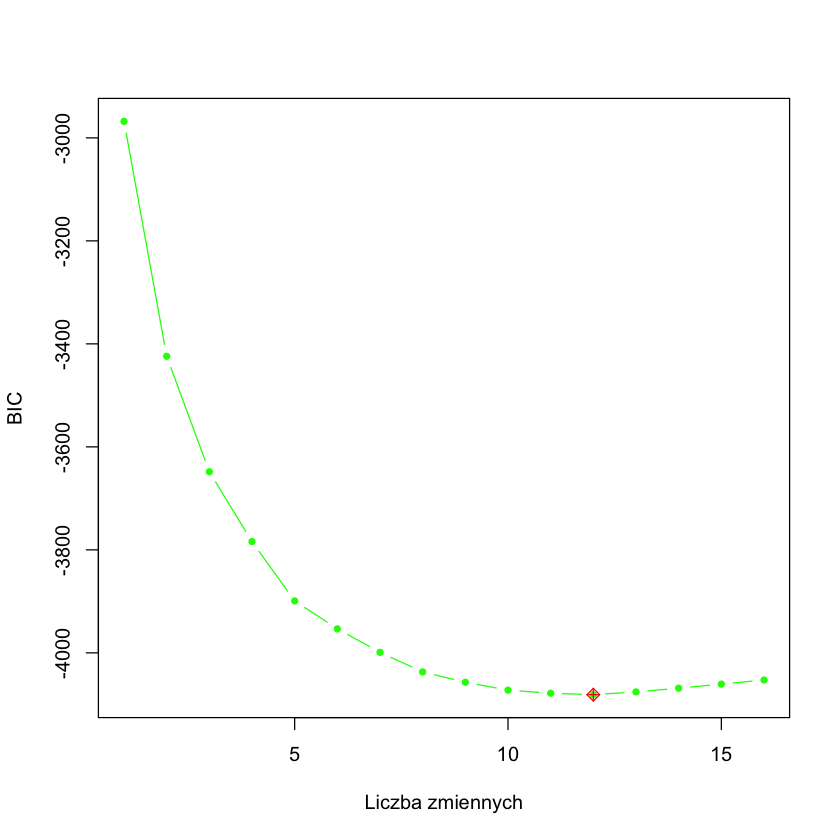

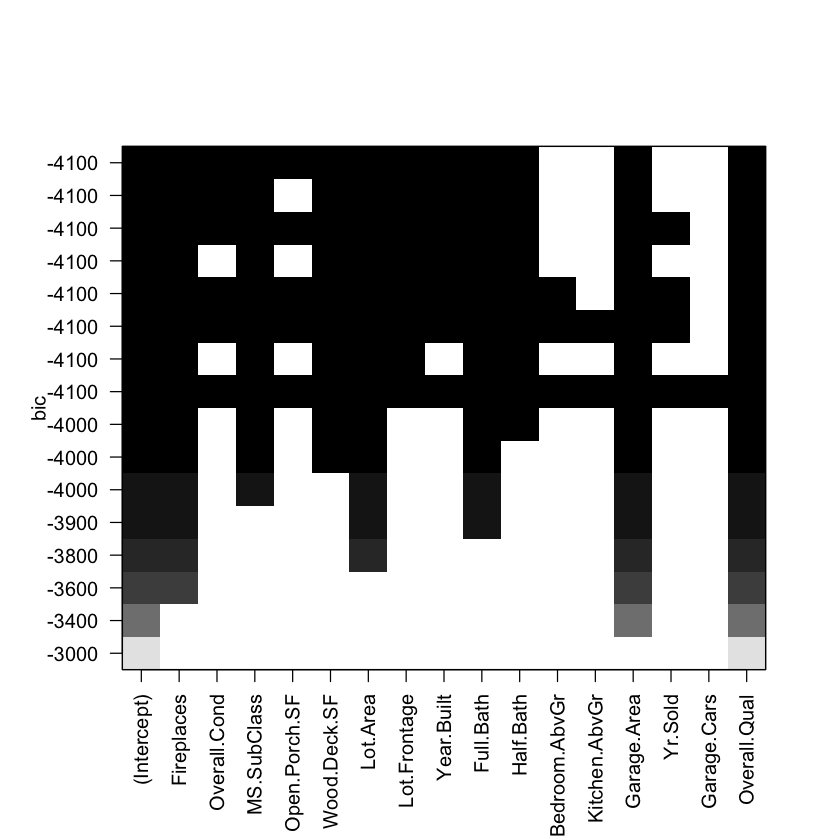

In [161]:
bic_min = which.min(features_fwd_sum$bic)
bic_min 
features_fwd_sum$bic[bic_min]
plot(features_fwd_sum$bic, xlab = "Liczba zmiennych", ylab = "BIC", col = "green",
     type = "b", pch = 20)
points(bic_min, features_fwd_sum$bic[bic_min], col = "red", pch = 9)

plot(features_fwd, scale="bic")

#### Najlepszy podzbiór wg. kryterium Cp

[1] 13

[1] 11.83225

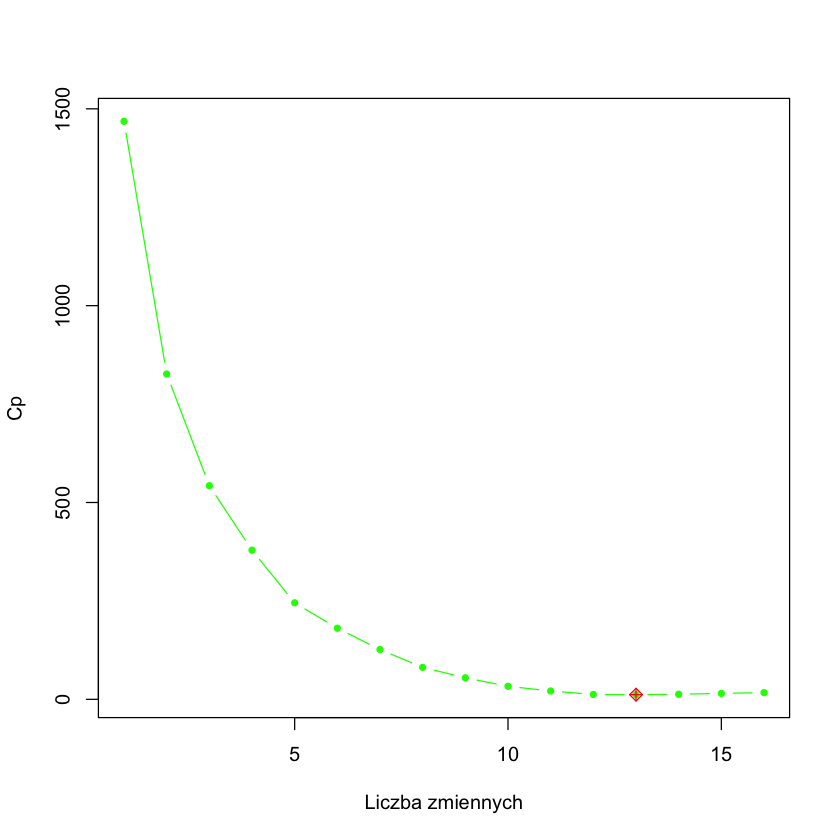

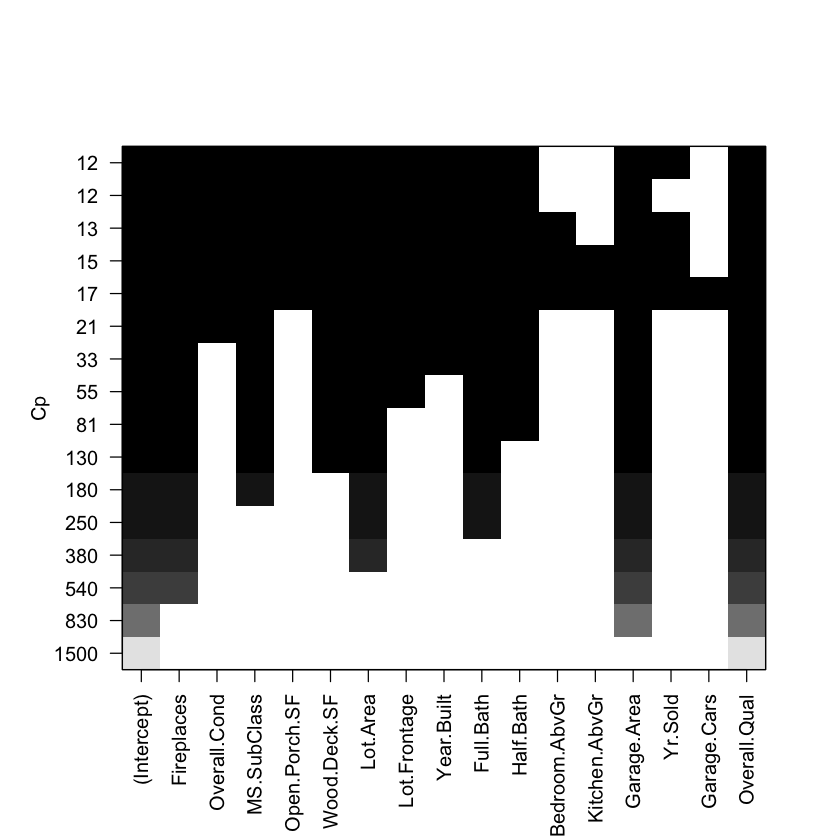

In [162]:
cp_min = which.min(features_fwd_sum$cp)
cp_min
features_fwd_sum$cp[cp_min]

plot(features_fwd_sum$cp, xlab = "Liczba zmiennych", ylab = "Cp", col = "green",
     type = "b", pch = 20)
points(cp_min, features_fwd_sum$cp[cp_min], col = "red", pch = 9)

plot(features_fwd, scale="Cp")


#### Najlepszy podzbiór wg. kryterium poprawionego R^2

[1] 13

[1] 0.7594329

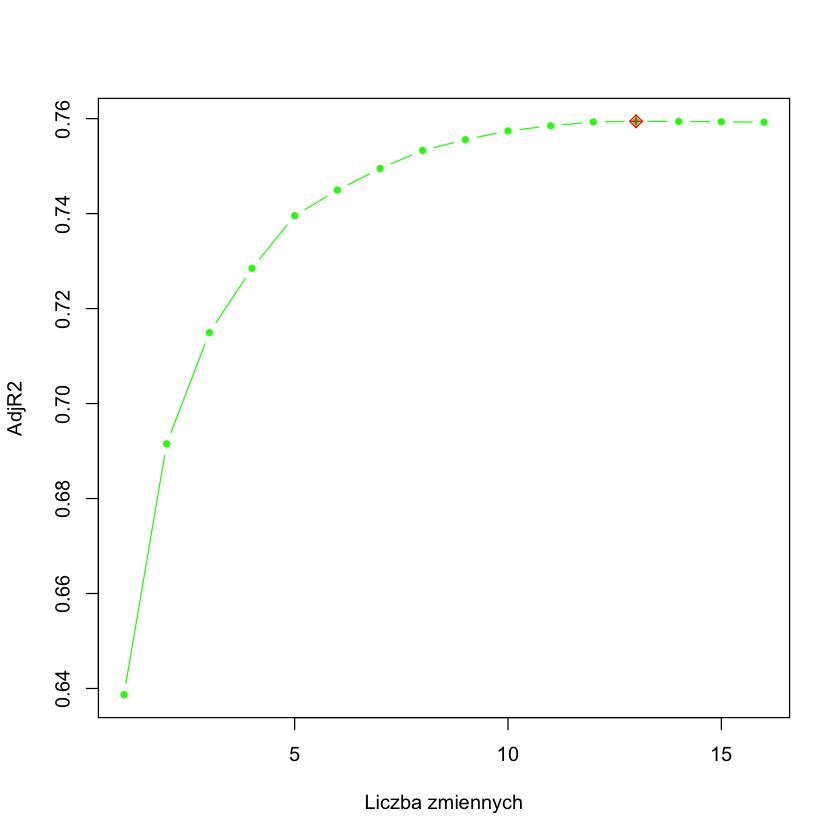

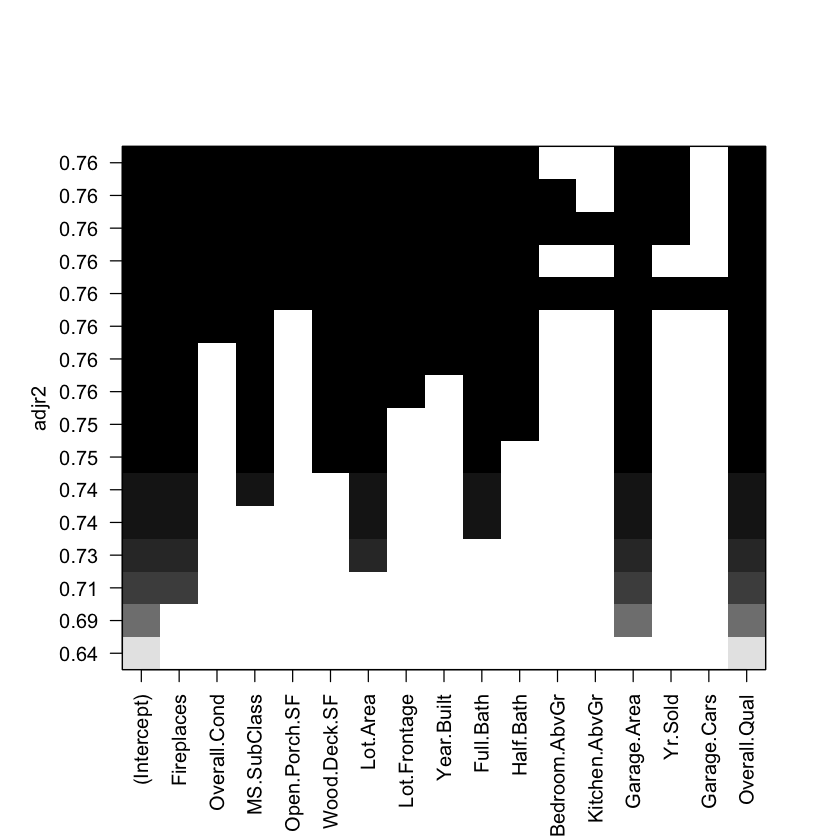

In [163]:
adjr2_max = which.max(features_fwd_sum$adjr2)
adjr2_max
features_fwd_sum$adjr2[adjr2_max]

plot(features_fwd_sum$adjr2, xlab = "Liczba zmiennych", ylab = "AdjR2", col = "green",
     type = "b", pch = 20)
points(adjr2_max, features_fwd_sum$adjr2[adjr2_max], col = "red", pch = 9)

plot(features_fwd, scale="adjr2")

## Metoda zbioru walidacyjnego 

In [166]:

predict.regsubsets <- function(object, newdata, id, ...) {
  model_formula <- as.formula(object$call[[2]])
  mat <- model.matrix(model_formula, newdata)
  coefs <- coef(object, id = id)
  mat[, names(coefs)] %*% coefs
}

prediction_error <- function(i, model, subset) {
  pred <- predict(model, data[subset,], id = i)
  mean((data$SalePrice[subset] - pred)^2)
}

In [189]:
n <- nrow(data)
train <- sample(c(TRUE, FALSE), n, replace = TRUE)
test <- !train
nvmax <- 16

In [190]:
prices_vs_v <- regsubsets(SalePrice ~ ., data = data[train, ], nvmax=nvmax)
val_errors <- sapply(1:nvmax, prediction_error, model = prices_vs_v, subset =test)
val_errors
optimal_size <- which.min(val_errors)
optimal_size

[1] 0.3750024 0.3223851 0.2992624 0.2836216 0.2694727 0.2690442 0.2602895
 [8] 0.2575058 0.2557593 0.2545261 0.2529787 0.2532780 0.2521798 0.2522810
[15] 0.2525073 0.2525186

[1] 13

## K-krotna walidacja krzyżowa

In [204]:
k <- 10
folds <- sample(1:k, n, replace = TRUE)
val_err <- NULL
for (j in 1:k) {
 fit_bs <- regsubsets(SalePrice ~ ., data = data[folds != j,], nvmax = nvmax)
 err <- sapply(1:nvmax, prediction_error, model = fit_bs, subset = (folds == j))
 val_err <- rbind(val_err, err)
}
mean_err <- colMeans(val_err)
mean_err
which.min(mean_err)

[1] 0.3633960 0.3105160 0.2889496 0.2844915 0.2716025 0.2666863 0.2609816
 [8] 0.2555237 0.2520364 0.2475435 0.2470367 0.2460676 0.2470006 0.2468841
[15] 0.2471140 0.2471709

[1] 12

# Regularyzacja

In [210]:
# install.packages("glmnet")
library(glmnet)
data <- load_data()
X <- model.matrix(SalePrice ~ ., data=data)[, -1]
y <- data$SalePrice

## Regresja grzbietowa

In [211]:
lambda_grid <- 10^seq(10, -2, length.out = 100)
fit_ridge <- glmnet(X, y, alpha = 0, lambda = lambda_grid)

In [215]:
lambda_grid

[1] 1.000000e+10 7.564633e+09 5.722368e+09 4.328761e+09 3.274549e+09
  [6] 2.477076e+09 1.873817e+09 1.417474e+09 1.072267e+09 8.111308e+08
 [11] 6.135907e+08 4.641589e+08 3.511192e+08 2.656088e+08 2.009233e+08
 [16] 1.519911e+08 1.149757e+08 8.697490e+07 6.579332e+07 4.977024e+07
 [21] 3.764936e+07 2.848036e+07 2.154435e+07 1.629751e+07 1.232847e+07
 [26] 9.326033e+06 7.054802e+06 5.336699e+06 4.037017e+06 3.053856e+06
 [31] 2.310130e+06 1.747528e+06 1.321941e+06 1.000000e+06 7.564633e+05
 [36] 5.722368e+05 4.328761e+05 3.274549e+05 2.477076e+05 1.873817e+05
 [41] 1.417474e+05 1.072267e+05 8.111308e+04 6.135907e+04 4.641589e+04
 [46] 3.511192e+04 2.656088e+04 2.009233e+04 1.519911e+04 1.149757e+04
 [51] 8.697490e+03 6.579332e+03 4.977024e+03 3.764936e+03 2.848036e+03
 [56] 2.154435e+03 1.629751e+03 1.232847e+03 9.326033e+02 7.054802e+02
 [61] 5.336699e+02 4.037017e+02 3.053856e+02 2.310130e+02 1.747528e+02
 [66] 1.321941e+02 1.000000e+02 7.564633e+01 5.722368e+01 4.328761e+01
 [71] 3.274549e+01 2.477076e+01 1.873817e+01 1.417474e+01 1.072267e+01
 [76] 8.111308e+00 6.135907e+00 4.641589e+00 3.511192e+00 2.656088e+00
 [81] 2.009233e+00 1.519911e+00 1.149757e+00 8.697490e-01 6.579332e-01
 [86] 4.977024e-01 3.764936e-01 2.848036e-01 2.154435e-01 1.629751e-01
 [91] 1.232847e-01 9.326033e-02 7.054802e-02 5.336699e-02 4.037017e-02
 [96] 3.053856e-02 2.310130e-02 1.747528e-02 1.321941e-02 1.000000e-02

In [213]:
dim(coef(fit_ridge))
fit_ridge$lambda[50]
coef_ridge <- coef(fit_ridge)[, 50]
coef_ridge
sqrt(sum(coef_ridge[-1]^2))

[1]  76 100

[1] 11497.57

(Intercept)            Fireplaces          Overall.Cond 
        -3.193978e-04          4.125471e-05         -8.837416e-06 
          MS.SubClass         Open.Porch.SF          Wood.Deck.SF 
        -7.397226e-06          2.720395e-05          2.843813e-05 
        Land.SlopeMod         Land.SlopeSev              Lot.Area 
         2.735234e-05          2.907734e-05          2.317159e-05 
         Lot.Frontage            Year.Built       Roof.StyleGable 
         2.962068e-05          4.853886e-05         -5.488915e-05 
    Roof.StyleGambrel         Roof.StyleHip     Roof.StyleMansard 
        -4.659620e-05          6.150517e-05         -1.591391e-05 
       Roof.StyleShed       UtilitiesNoSeWa       UtilitiesNoSewr 
         1.351595e-05         -4.712890e-05         -1.028825e-04 
           StreetPave             Full.Bath             Half.Bath 
         8.100131e-05          4.742704e-05          2.477819e-05 
        Bedroom.AbvGr         Kitchen.AbvGr           Garage.Area 
         1.250954e-05         -1.041480e-05          5.566453e-05 
         Paved.DriveP          Paved.DriveY Sale.ConditionAdjLand 
        -5.113808e-05          8.104394e-05         -7.851524e-05 
 Sale.ConditionAlloca  Sale.ConditionFamily  Sale.ConditionNormal 
        -2.079204e-05         -2.577025e-05         -3.223783e-05 
Sale.ConditionPartial               Yr.Sold           Garage.Cars 
         1.099216e-04         -2.657022e-06          5.631237e-05 
          HeatingGasA           HeatingGasW           HeatingGrav 
         5.651920e-05         -2.390928e-05         -1.059336e-04 
          HeatingOthW           HeatingWall       ElectricalFuseA 
        -5.991151e-05         -1.129949e-04         -6.803997e-05 
      ElectricalFuseF       ElectricalFuseP         ElectricalMix 
        -8.309112e-05         -9.885368e-05         -1.238572e-04 
      ElectricalSBrkr   Exterior.1stAsphShn   Exterior.1stBrkComm 
         7.480338e-05         -9.754189e-05         -4.719065e-05 
  Exterior.1stBrkFace    Exterior.1stCBlock   Exterior.1stCemntBd 
         7.870652e-06         -9.531420e-05          6.087728e-05 
  Exterior.1stHdBoard   Exterior.1stImStucc   Exterior.1stMetalSd 
        -2.553271e-05          8.838124e-05         -3.472693e-05 
  Exterior.1stPlywood   Exterior.1stPreCast     Exterior.1stStone 
        -1.507757e-05          8.625730e-05          8.462494e-05 
   Exterior.1stStucco   Exterior.1stVinylSd   Exterior.1stWd Sdng 
        -3.426151e-05          6.091557e-05         -4.295838e-05 
  Exterior.1stWdShing   Exterior.2ndAsphShn   Exterior.2ndBrk Cmn 
        -3.108489e-05         -6.176533e-05         -4.742817e-05 
  Exterior.2ndBrkFace    Exterior.2ndCBlock   Exterior.2ndCmentBd 
         8.149437e-06         -7.201250e-05          5.961715e-05 
  Exterior.2ndHdBoard   Exterior.2ndImStucc   Exterior.2ndMetalSd 
        -2.407347e-05          8.438835e-05         -3.240080e-05 
    Exterior.2ndOther   Exterior.2ndPlywood   Exterior.2ndPreCast 
         1.504296e-04         -2.014590e-05          8.625561e-05 
    Exterior.2ndStone    Exterior.2ndStucco   Exterior.2ndVinylSd 
        -3.855776e-05         -3.560504e-05          6.046950e-05 
  Exterior.2ndWd Sdng   Exterior.2ndWd Shng          Overall.Qual 
        -4.259411e-05         -2.997446e-05          6.947594e-05 
         Central.AirY 
         9.199116e-05

[1] 0.0005323287

In [214]:
fit_ridge$lambda[70]
coef(fit_ridge)[, 70]
sqrt(sum(coef(fit_ridge)[-1, 70]^2))

[1] 43.28761

(Intercept)            Fireplaces          Overall.Cond 
        -0.0722327039          0.0099604744         -0.0018669838 
          MS.SubClass         Open.Porch.SF          Wood.Deck.SF 
        -0.0017854032          0.0064419596          0.0067771228 
        Land.SlopeMod         Land.SlopeSev              Lot.Area 
         0.0071164525          0.0071019731          0.0056029381 
         Lot.Frontage            Year.Built       Roof.StyleGable 
         0.0070555808          0.0112397031         -0.0132362069 
    Roof.StyleGambrel         Roof.StyleHip     Roof.StyleMansard 
        -0.0102625318          0.0147798780         -0.0037531276 
       Roof.StyleShed       UtilitiesNoSeWa       UtilitiesNoSewr 
         0.0031294554         -0.0112349258         -0.0243868575 
           StreetPave             Full.Bath             Half.Bath 
         0.0194246715          0.0112423638          0.0058444595 
        Bedroom.AbvGr         Kitchen.AbvGr           Garage.Area 
         0.0029804786         -0.0024543349          0.0131313772 
         Paved.DriveP          Paved.DriveY Sale.ConditionAdjLand 
        -0.0112936736          0.0183849723         -0.0173721187 
 Sale.ConditionAlloca  Sale.ConditionFamily  Sale.ConditionNormal 
        -0.0049190716         -0.0064537539         -0.0073584527 
Sale.ConditionPartial               Yr.Sold           Garage.Cars 
         0.0258005557         -0.0006234297          0.0132462371 
          HeatingGasA           HeatingGasW           HeatingGrav 
         0.0121872482         -0.0045438453         -0.0232739274 
          HeatingOthW           HeatingWall       ElectricalFuseA 
        -0.0128419401         -0.0258471946         -0.0151699091 
      ElectricalFuseF       ElectricalFuseP         ElectricalMix 
        -0.0185147925         -0.0221140148         -0.0291188672 
      ElectricalSBrkr   Exterior.1stAsphShn   Exterior.1stBrkComm 
         0.0166887171         -0.0214395838         -0.0101608408 
  Exterior.1stBrkFace    Exterior.1stCBlock   Exterior.1stCemntBd 
         0.0025400158         -0.0220554739          0.0146426065 
  Exterior.1stHdBoard   Exterior.1stImStucc   Exterior.1stMetalSd 
        -0.0062417901          0.0205591116         -0.0076630609 
  Exterior.1stPlywood   Exterior.1stPreCast     Exterior.1stStone 
        -0.0038178690          0.0234109416          0.0213780717 
   Exterior.1stStucco   Exterior.1stVinylSd   Exterior.1stWd Sdng 
        -0.0074819184          0.0137075445         -0.0095338579 
  Exterior.1stWdShing   Exterior.2ndAsphShn   Exterior.2ndBrk Cmn 
        -0.0069892328         -0.0137020350         -0.0114421574 
  Exterior.2ndBrkFace    Exterior.2ndCBlock   Exterior.2ndCmentBd 
         0.0022684889         -0.0161477279          0.0143302328 
  Exterior.2ndHdBoard   Exterior.2ndImStucc   Exterior.2ndMetalSd 
        -0.0058408891          0.0207476664         -0.0071009254 
    Exterior.2ndOther   Exterior.2ndPlywood   Exterior.2ndPreCast 
         0.0359419245         -0.0049888005          0.0234109484 
    Exterior.2ndStone    Exterior.2ndStucco   Exterior.2ndVinylSd 
        -0.0083452796         -0.0077868869          0.0135950221 
  Exterior.2ndWd Sdng   Exterior.2ndWd Shng          Overall.Qual 
        -0.0094196175         -0.0066305507          0.0167105002 
         Central.AirY 
         0.0208488185

[1] 0.1243271

Duże wartości lambda dają małą normę wag, a niskie dużą

In [216]:
predict(fit_ridge, s = 50, type = "coefficients") # estymata dla nowej wartości lambda

76 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)           -0.0647636048
Fireplaces             0.0088735044
Overall.Cond          -0.0016863616
MS.SubClass           -0.0015906498
Open.Porch.SF          0.0057498973
Wood.Deck.SF           0.0060451255
Land.SlopeMod          0.0062958557
Land.SlopeSev          0.0063224736
Lot.Area               0.0049909660
Lot.Frontage           0.0062940845
Year.Built             0.0100539624
Roof.StyleGable       -0.0117942216
Roof.StyleGambrel     -0.0092264634
Roof.StyleHip          0.0131739801
Roof.StyleMansard     -0.0033491119
Roof.StyleShed         0.0028000746
UtilitiesNoSeWa       -0.0100196708
UtilitiesNoSewr       -0.0217604911
StreetPave             0.0173139025
Full.Bath              0.0100332195
Half.Bath              0.0052184005
Bedroom.AbvGr          0.0026587638
Kitchen.AbvGr         -0.0021915889
Garage.Area            0.0117249421
Paved.DriveP          -0.0101508500
Paved.DriveY          

In [217]:
set.seed(1)
n <- nrow(X)
train <- sample(n, n / 2)
test <- -train
fit_ridge <- glmnet(X[train,], y[train], alpha = 0, lambda = lambda_grid, thresh = 1e-12)

# ppredykcja dla lambda=4
pred_ridge <- predict(fit_ridge, s = 4, newx = X[test,])
mean((pred_ridge - y[test])^2)

[1] 0.3617271

In [218]:
pred_null <- mean(y[train])
mean((pred_null - y[test])^2)

[1] 0.9351883

In [219]:
pred_ridge_big <- predict(fit_ridge, s = 1e10, newx = X[test,])
mean((pred_ridge_big - y[test])^2)


[1] 0.9351883

Dla mniejszej lambdy błąd MSE jest mniejszy. Dla dużej - zbliża się do wartości
MSE dla modelu zerowego.

### Model optymalny

[1] 0.08219192

76 x 1 sparse Matrix of class "dgCMatrix"
                                s1
(Intercept)           -0.338119799
Fireplaces             0.124651522
Overall.Cond           0.047788291
MS.SubClass           -0.051117115
Open.Porch.SF          0.034749401
Wood.Deck.SF           0.069873209
Land.SlopeMod          0.209484356
Land.SlopeSev         -0.060036597
Lot.Area               0.082921803
Lot.Frontage           0.057676358
Year.Built             0.088930420
Roof.StyleGable       -0.089746938
Roof.StyleGambrel      0.003134718
Roof.StyleHip          0.132873841
Roof.StyleMansard     -0.200412269
Roof.StyleShed         0.016864346
UtilitiesNoSeWa       -0.304186665
UtilitiesNoSewr       -0.332743548
StreetPave             0.416938548
Full.Bath              0.116264011
Half.Bath              0.061717214
Bedroom.AbvGr          0.026044844
Kitchen.AbvGr         -0.014044108
Garage.Area            0.123832015
Paved.DriveP          -0.100164053
Paved.DriveY          -0.056997359
Sale.Conditio

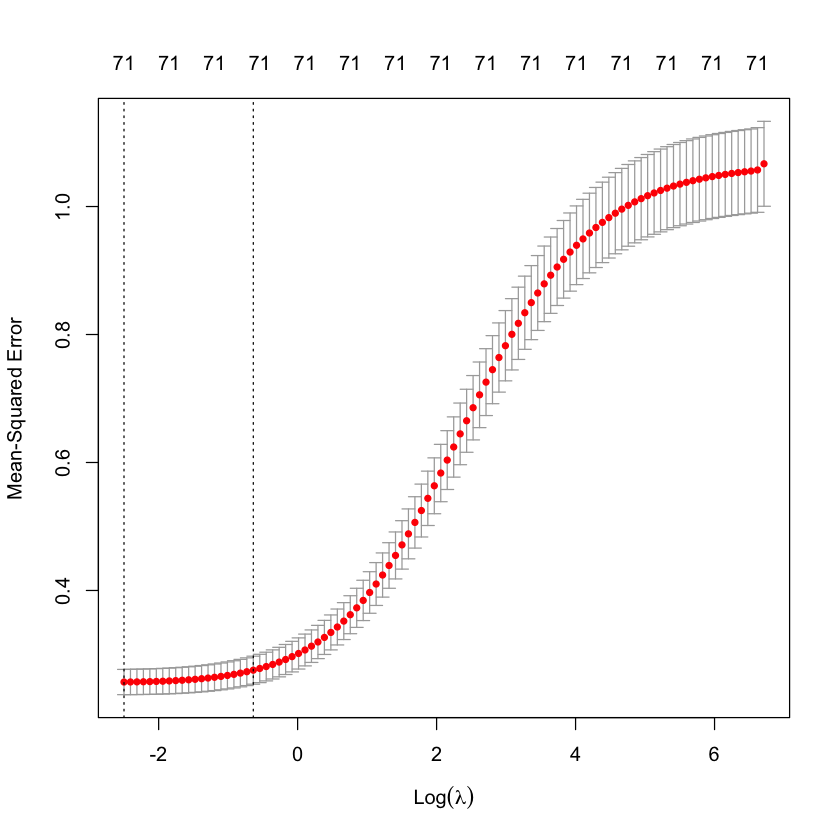

In [221]:
set.seed(1)
cv_out <- cv.glmnet(X[train,], y[train], alpha = 0)
plot(cv_out)
cv_out$lambda.min

fit_ridge_full <- glmnet(X, y, alpha = 0)
predict(fit_ridge_full, s = cv_out$lambda.min, type = "coefficients")

### MSE dla modelu optymalnego

In [222]:
# MSE 
pred_ridge_opt <- predict(fit_ridge, s = cv_out$lambda.min, newx = X[test,])
mean((pred_ridge_opt - y[test])^2)

[1] 0.2033198

## Lasso 

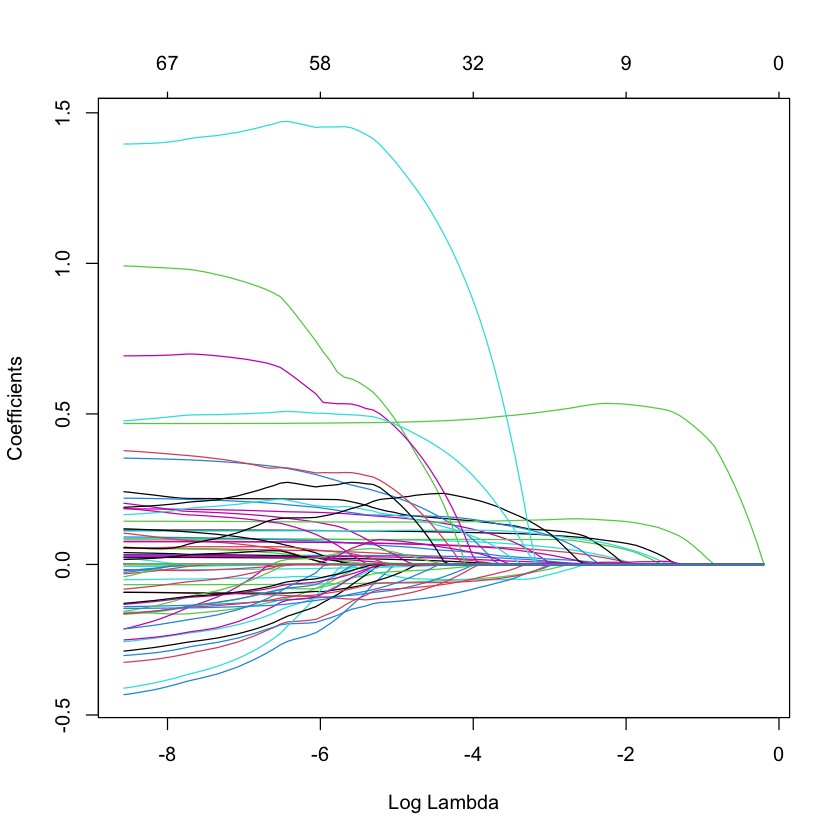

In [223]:
fit_lasso <- glmnet(X[train,], y[train], alpha = 1)
plot(fit_lasso, xvar = "lambda")

### Model optymalny 

[1] -4.661733

[1] 0.2026763

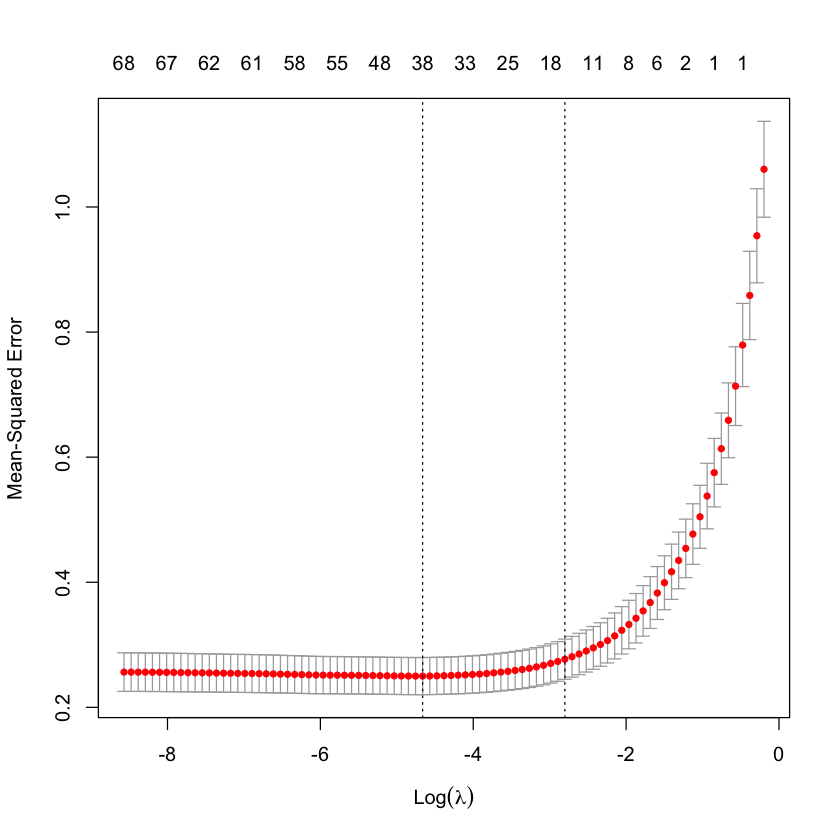

In [226]:
cv_out <- cv.glmnet(X[train,], y[train], alpha = 1)
plot(cv_out)
log(cv_out$lambda.min)
pred_lasso <- predict(fit_lasso, s = cv_out$lambda.min, newx = X[test,])
mean((pred_lasso - y[test])^2)

#### regresja grzbietowa, metoda najmniejszych kwadratów i model zerowy

In [228]:
# model zerowy 
pred_null <- mean(y[train])
mean((pred_null - y[test])^2)

# najmniejse kwadraty 
pred_lasso_0 <- predict(fit_lasso, x = X[train,], y = y[train], s = 0,
 newx = X[test,], exact = TRUE)
mean((pred_lasso_0 - y[test])^2)

# optymalna regresja grzbietowa
pred_ridge_opt <- predict(fit_ridge, s = cv_out$lambda.min, newx = X[test,])
mean((pred_ridge_opt - y[test])^2)

[1] 0.9351883

[1] 0.2084387

[1] 0.2064034

In [229]:
mean((pred_lasso - y[test])^2) - mean((pred_ridge_opt - y[test])^2)

[1] -0.0037271

Zarówno Lasso jak i regresja grzbietowa osiągnęły lepsze wyniki niż metoda najmnieszych kwadratów. W całym zestawieniu Najlepiej jednak wypada Lasso, osiągając błąd w przybliżeniu niższy o 0.004.

### Współczynniki w regresji lasso

In [237]:
fit_lasso_full <- glmnet(X, y, alpha = 1)
coefs <- predict(fit_lasso_full, s = cv_out$lambda.min, type = "coefficients")
coefs

76 x 1 sparse Matrix of class "dgCMatrix"
                                 s1
(Intercept)           -0.2553828323
Fireplaces             0.1157576337
Overall.Cond           0.0299174651
MS.SubClass           -0.0521110672
Open.Porch.SF          0.0239669855
Wood.Deck.SF           0.0639363818
Land.SlopeMod          0.1902927940
Land.SlopeSev          .           
Lot.Area               0.0798633324
Lot.Frontage           0.0551121080
Year.Built             0.0600839765
Roof.StyleGable       -0.0250484240
Roof.StyleGambrel      .           
Roof.StyleHip          0.1671370586
Roof.StyleMansard     -0.0209509151
Roof.StyleShed         .           
UtilitiesNoSeWa        .           
UtilitiesNoSewr       -0.0145225607
StreetPave             0.2360723475
Full.Bath              0.1146470714
Half.Bath              0.0561742573
Bedroom.AbvGr          0.0140441029
Kitchen.AbvGr          .           
Garage.Area            0.1452817310
Paved.DriveP          -0.0108508135
Paved.DriveY          

Regularyzacja L1 spowodowała, że współczynniki stojące przy mniej znaczących zmiennych zostały wyzerowane, podczas gdy L2, że zostały zbliżone do zera, lecz większość z nich pozostała niezerowa

# Modele nieliniowe

In [239]:
install.packages("gam")
library(gam)


The downloaded binary packages are in
	/var/folders/j2/83k2pfk133n_vkpjy9xj72c00000gn/T//Rtmpgexkrd/downloaded_packages


Loading required package: splines

Loading required package: foreach

Loaded gam 1.22-2




## GAM

In [241]:
fit_gam_ls <- lm(SalePrice ~ ns(Overall.Qual, df = 4) + ns(Garage.Area, df = 5)+ Fireplaces, data=data)
fit_gam_ls
summary(fit_gam_ls)


Call:
lm(formula = SalePrice ~ ns(Overall.Qual, df = 4) + ns(Garage.Area, 
    df = 5) + Fireplaces, data = data)

Coefficients:
              (Intercept)  ns(Overall.Qual, df = 4)1  
                  -1.7924                     1.2783  
ns(Overall.Qual, df = 4)2  ns(Overall.Qual, df = 4)3  
                   1.4994                     3.9363  
ns(Overall.Qual, df = 4)4   ns(Garage.Area, df = 5)1  
                   3.7779                     0.2725  
 ns(Garage.Area, df = 5)2   ns(Garage.Area, df = 5)3  
                   0.2768                     1.2479  
 ns(Garage.Area, df = 5)4   ns(Garage.Area, df = 5)5  
                   0.7516                     0.4229  
               Fireplaces  
                   0.1759  



Call:
lm(formula = SalePrice ~ ns(Overall.Qual, df = 4) + ns(Garage.Area, 
    df = 5) + Fireplaces, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8225 -0.2724 -0.0087  0.2222  3.5600 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               -1.79235    0.13146 -13.634  < 2e-16 ***
ns(Overall.Qual, df = 4)1  1.27831    0.12675  10.085  < 2e-16 ***
ns(Overall.Qual, df = 4)2  1.49935    0.08718  17.198  < 2e-16 ***
ns(Overall.Qual, df = 4)3  3.93630    0.27730  14.195  < 2e-16 ***
ns(Overall.Qual, df = 4)4  3.77792    0.09107  41.485  < 2e-16 ***
ns(Garage.Area, df = 5)1   0.27251    0.05075   5.370 8.51e-08 ***
ns(Garage.Area, df = 5)2   0.27681    0.04844   5.715 1.21e-08 ***
ns(Garage.Area, df = 5)3   1.24785    0.07899  15.798  < 2e-16 ***
ns(Garage.Area, df = 5)4   0.75159    0.11947   6.291 3.62e-10 ***
ns(Garage.Area, df = 5)5   0.42293    0.17652   2.396   0.0166 *  
Fireplaces                 0.17588    0

In [243]:
fit_gam_bf <- gam(SalePrice ~ s(Overall.Qual, df = 4) + s(Garage.Area, df = 5)+ Fireplaces, data = data)
summary(fit_gam_bf)


Call: gam(formula = SalePrice ~ s(Overall.Qual, df = 4) + s(Garage.Area, 
    df = 5) + Fireplaces, data = data)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-3.68623 -0.27074 -0.01091  0.21841  3.69409 

(Dispersion Parameter for gaussian family taken to be 0.23)

    Null Deviance: 2929 on 2929 degrees of freedom
Residual Deviance: 671.4019 on 2919 degrees of freedom
AIC: 4021.949 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                          Df  Sum Sq Mean Sq F value    Pr(>F)    
s(Overall.Qual, df = 4)    1 1832.06 1832.06 7965.10 < 2.2e-16 ***
s(Garage.Area, df = 5)     1  125.87  125.87  547.22 < 2.2e-16 ***
Fireplaces                 1   76.42   76.42  332.25 < 2.2e-16 ***
Residuals               2919  671.40    0.23                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
                        Npar Df  Npar F     Pr(F)    
(Intercept)                    

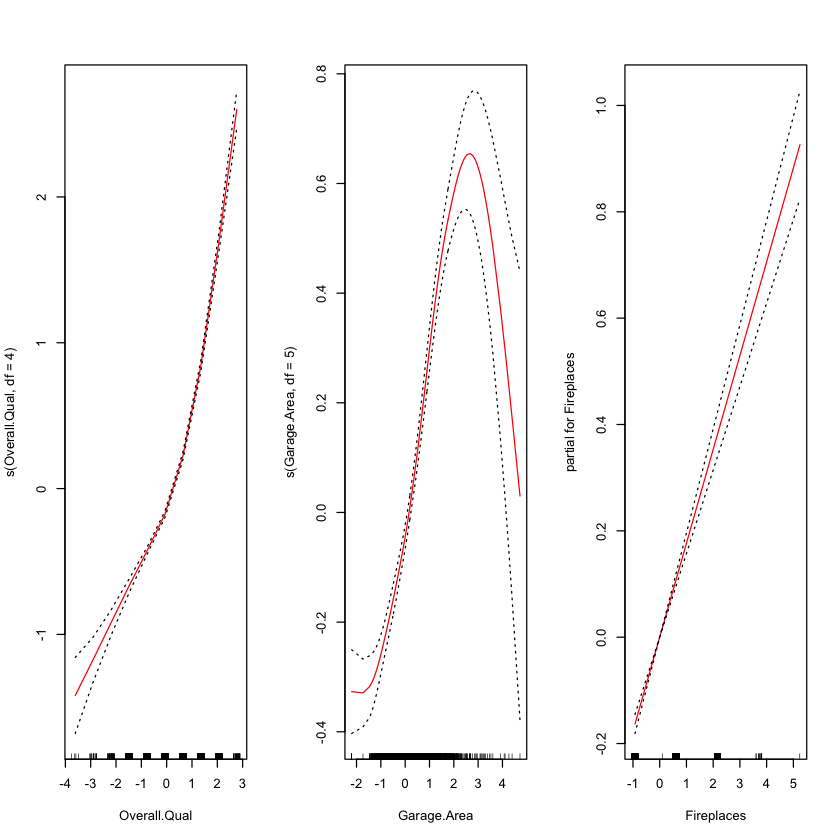

In [244]:
par(mfrow = c(1, 3))
plot(fit_gam_bf, col = "red", se = TRUE)

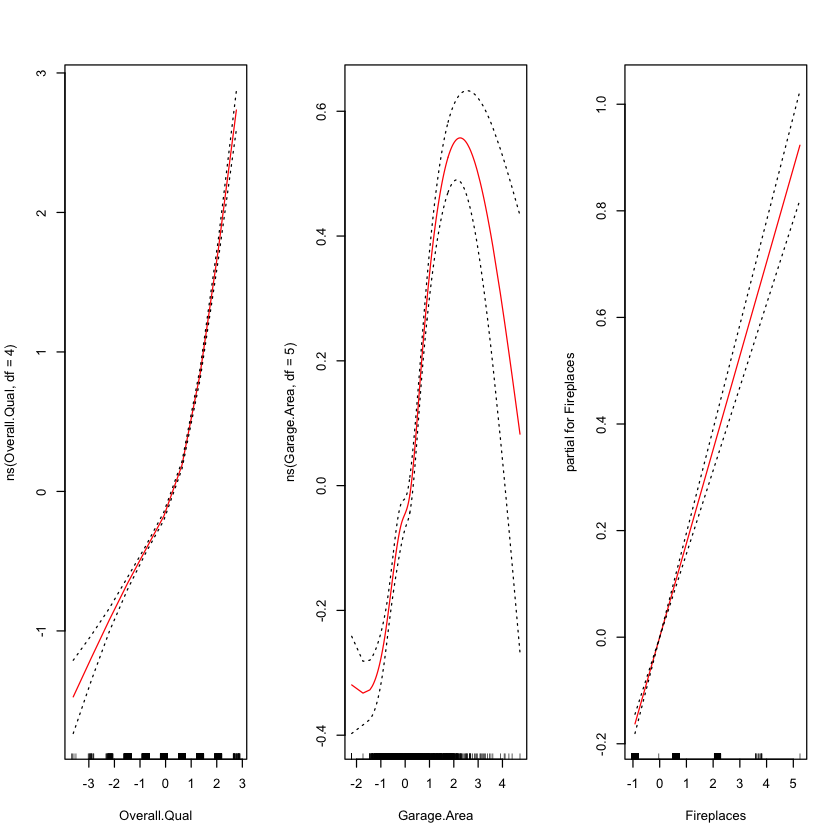

In [245]:
par(mfrow = c(1, 3))
plot.Gam(fit_gam_ls, col = "red", se = TRUE)

In [294]:
fit_gam_1 <- gam(SalePrice ~ s(Overall.Qual, df = 4), data = data)
fit_gam_2 <- gam(SalePrice ~  s(Overall.Qual, df = 4) + Fireplaces, data = data)
fit_gam_3 <- gam(SalePrice ~  s(Overall.Qual, df = 4) + Fireplaces + s(Garage.Area, df=4), data = data)
fit_gam_4 <- gam(SalePrice ~  s(Overall.Qual, df = 4) + Fireplaces + s(Garage.Area, df=4) + Kitchen.AbvGr, data = data)
anova(fit_gam_1, fit_gam_2, fit_gam_3, fit_gam_4, test = "F")

,Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2925,874.9957,NA,NA,NA,NA
2,2924,785.1400,1.000000,89.8557260,389.530120,1.715813e-81
3,2920,673.8566,4.000012,111.2833475,120.604688,2.339119e-95
4,2919,673.3468,1.000000,0.5098665,2.210303,1.371998e-01


Jak można zauważyć w powyższej tabeli, model 2 okazuje się być znacząco lepszy niż model 1, model 3 niż model 2, natomaist dodanie kolejnego predyktora w postaci ilości kuchni powyżej piwnicy w modelu 4 nie powoduje znacznej poprawy ponad modelem 3.

Dopasowanie modelu wykorzystującego lokalną regresję


Call: gam(formula = SalePrice ~ s(Year.Built, df = 5) + lo(Garage.Area, 
    span = 0.2) + Full.Bath, data = data)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-2.46411 -0.34727 -0.04834  0.23280  5.37347 

(Dispersion Parameter for gaussian family taken to be 0.3974)

    Null Deviance: 2929 on 2929 degrees of freedom
Residual Deviance: 1157.205 on 2912.112 degrees of freedom
AIC: 5630.801 

Number of Local Scoring Iterations: 1 

Anova for Parametric Effects
                                Df  Sum Sq Mean Sq F value    Pr(>F)    
s(Year.Built, df = 5)          1.0 1002.04 1002.04 2521.65 < 2.2e-16 ***
lo(Garage.Area, span = 0.2)    1.0  442.60  442.60 1113.81 < 2.2e-16 ***
Full.Bath                      1.0  112.73  112.73  283.69 < 2.2e-16 ***
Residuals                   2912.1 1157.20    0.40                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
                            Npar Df Npar F     P

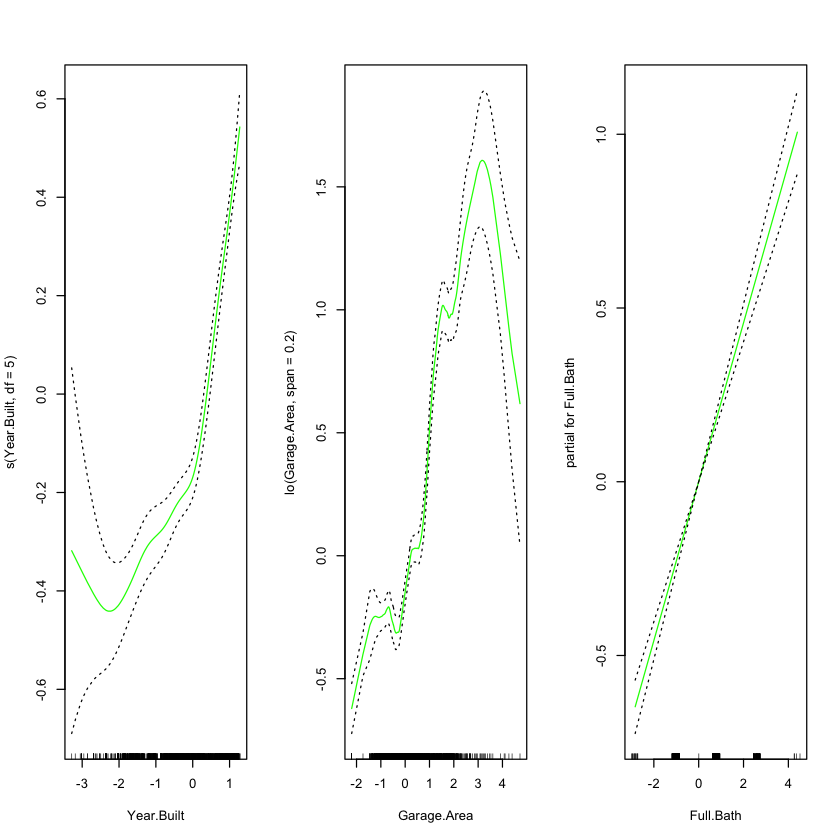

In [256]:
fit_gam_lo <- gam(SalePrice ~ s(Year.Built, df = 5) + lo(Garage.Area, span=0.2) + Full.Bath, data = data)
summary(fit_gam_lo)
par(mfrow = c(1, 3))
plot(fit_gam_lo, col = "green", se = TRUE)

## GAM w regresji logistycznej

Tworzymy klasyfikator z dwoma klasami: drogie domy (SalePrice > 0) i tanie domy (poniżej tego progu)

In [270]:
sum(I(data$SalePrice > 0)) / length(data$SalePrice)

[1] 0.3832765


Call: gam(formula = I(SalePrice > 0) ~ s(Overall.Qual, df = 4) + s(Garage.Area, 
    df = 5) + Fireplaces, family = binomial, data = data)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-3.0444 -0.3967 -0.1030  0.3429  3.3669 

(Dispersion Parameter for binomial family taken to be 1)

    Null Deviance: 3900.682 on 2929 degrees of freedom
Residual Deviance: 1740.826 on 2919 degrees of freedom
AIC: 1762.827 

Number of Local Scoring Iterations: NA 

Anova for Parametric Effects
                          Df  Sum Sq Mean Sq F value    Pr(>F)    
s(Overall.Qual, df = 4)    1  460.87  460.87  453.42 < 2.2e-16 ***
s(Garage.Area, df = 5)     1  138.08  138.08  135.84 < 2.2e-16 ***
Fireplaces                 1  112.60  112.60  110.78 < 2.2e-16 ***
Residuals               2919 2966.95    1.02                      
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Anova for Nonparametric Effects
                        Npar Df Npar Chisq    P(Chi)    
(Intercept)

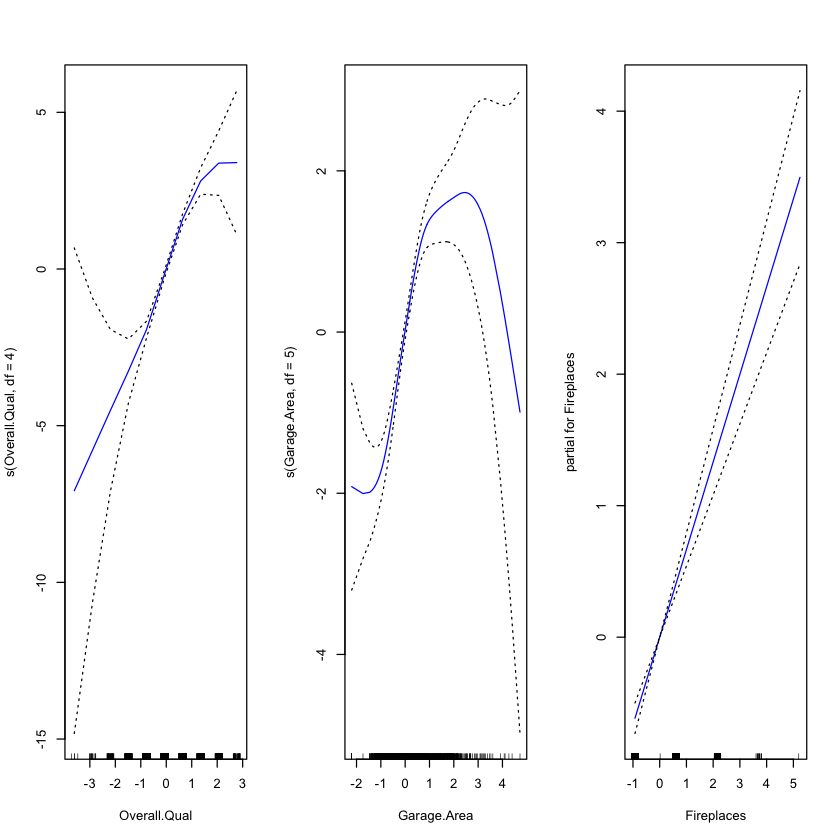

In [272]:
fit_logistic_gam <- gam(I(SalePrice > 0) ~ s(Overall.Qual, df = 4) + s(Garage.Area, df = 5)+ Fireplaces, family = binomial, data = data)
summary(fit_logistic_gam)
par(mfrow = c(1, 3))
plot(fit_logistic_gam, col = "blue", se = TRUE)

# Drzewa decyzyjne 

In [295]:
install.packages("tree")
library(tree)


The downloaded binary packages are in
	/var/folders/j2/83k2pfk133n_vkpjy9xj72c00000gn/T//Rtmpgexkrd/downloaded_packages


## Klasyfikacja, czy dom jest drogi czy nie 

In [316]:
data <- load_data_unnorm()
dataE <- within(data, Expensive <- factor(ifelse(SalePrice > mean(data$SalePrice), "Yes", "No")))

In [317]:
expensive_tree <- tree(Expensive ~ . - SalePrice, data = dataE)
summary(expensive_tree)

Warning message in tree(Expensive ~ . - SalePrice, data = dataE):
"NAs introduced by coercion"



Classification tree:
tree(formula = Expensive ~ . - SalePrice, data = dataE)
Variables actually used in tree construction:
[1] "Overall.Qual" "Full.Bath"    "Fireplaces"   "Lot.Area"     "Garage.Area" 
[6] "MS.SubClass"  "Year.Built"  
Number of terminal nodes:  11 
Residual mean deviance:  0.5285 = 1543 / 2919 
Misclassification error rate: 0.1229 = 360 / 2930 

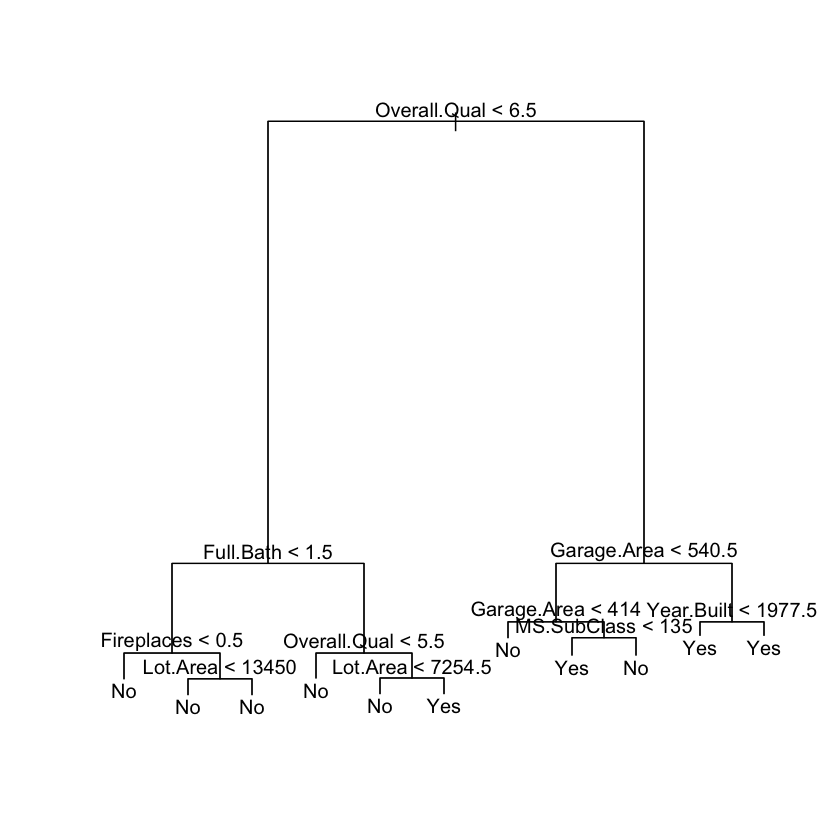

In [324]:
plot(expensive_tree)
text(expensive_tree, pretty = 0)

In [325]:
expensive_tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 2930 3901.00 No ( 0.61672 0.38328 )  
   2) Overall.Qual < 6.5 1840 1406.00 No ( 0.87228 0.12772 )  
     4) Full.Bath < 1.5 1207  323.80 No ( 0.97017 0.02983 )  
       8) Fireplaces < 0.5 821    0.00 No ( 1.00000 0.00000 ) *
       9) Fireplaces > 0.5 386  239.30 No ( 0.90674 0.09326 )  
        18) Lot.Area < 13450 328  109.40 No ( 0.96037 0.03963 ) *
        19) Lot.Area > 13450 58   77.90 No ( 0.60345 0.39655 ) *
     5) Full.Bath > 1.5 633  788.20 No ( 0.68562 0.31438 )  
      10) Overall.Qual < 5.5 253  184.20 No ( 0.88142 0.11858 ) *
      11) Overall.Qual > 5.5 380  522.10 No ( 0.55526 0.44474 )  
        22) Lot.Area < 7254.5 73   46.13 No ( 0.90411 0.09589 ) *
        23) Lot.Area > 7254.5 307  424.70 Yes ( 0.47231 0.52769 ) *
   3) Overall.Qual > 6.5 1090 1045.00 Yes ( 0.18532 0.81468 )  
     6) Garage.Area < 540.5 465  612.80 Yes ( 0.36989 0.63011 )  
      12) Garage.Area < 414 110  140.50 

### Duże drzewo

In [330]:
set.seed(1)
n <- nrow(dataE)
train <- sample(n, n / 2)
test <- -train
sales_high_tree <- tree(Expensive ~ . - SalePrice, data = dataE, subset = train)
tree_class <- predict(sales_high_tree, newdata = dataE[test,], type = "class")
table(tree_class, dataE$Expensive[test])
mean(tree_class != dataE$Expensive[test])

Warning message in tree(Expensive ~ . - SalePrice, data = dataE, subset = train):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


          
tree_class  No Yes
       No  827 119
       Yes  87 432

[1] 0.1406143

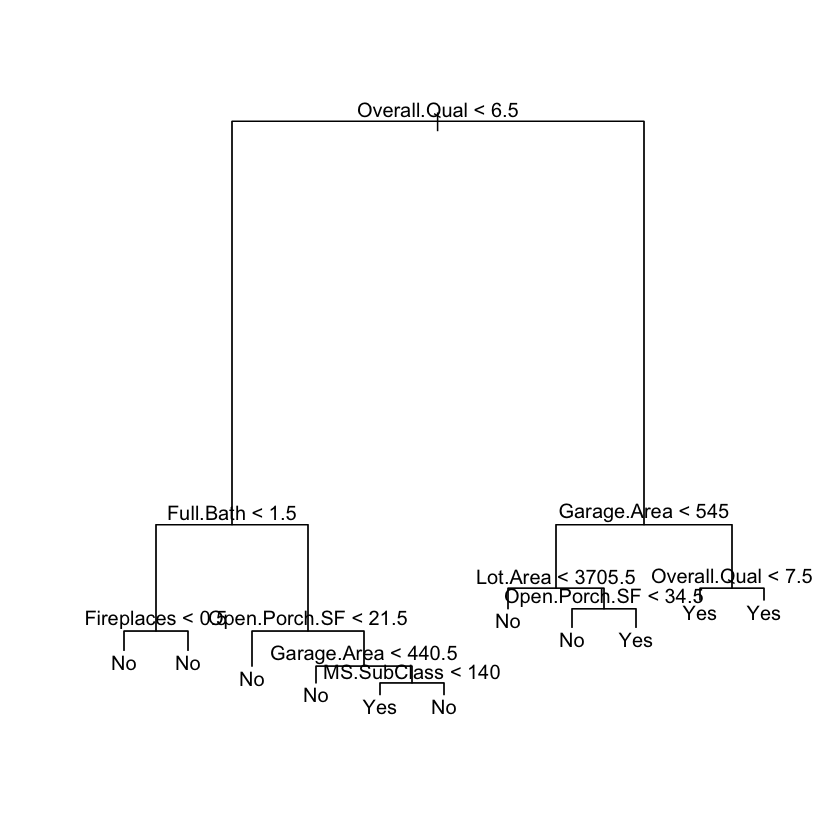

In [331]:
plot(sales_high_tree)
text(sales_high_tree, pretty = 0)

Szukamy optymalnego poddrzewa stosując przycinanie, konstruując w tym celu ciąg poddrzew wyznaczony przez malejącą złożoność.

Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tree, tree.matrix(nd)):
"NAs introduced by coercion"
Warning message in tree(model = m[rand != i, , drop = FALSE]):
"NAs introduced by coercion"
Warning message in pred1.tree(tre

$size
[1] 11  9  8  7  5  2  1

$dev
[1] 198 198 207 205 245 244 572

$k
[1] -Inf    0    7    8   12   13  337

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

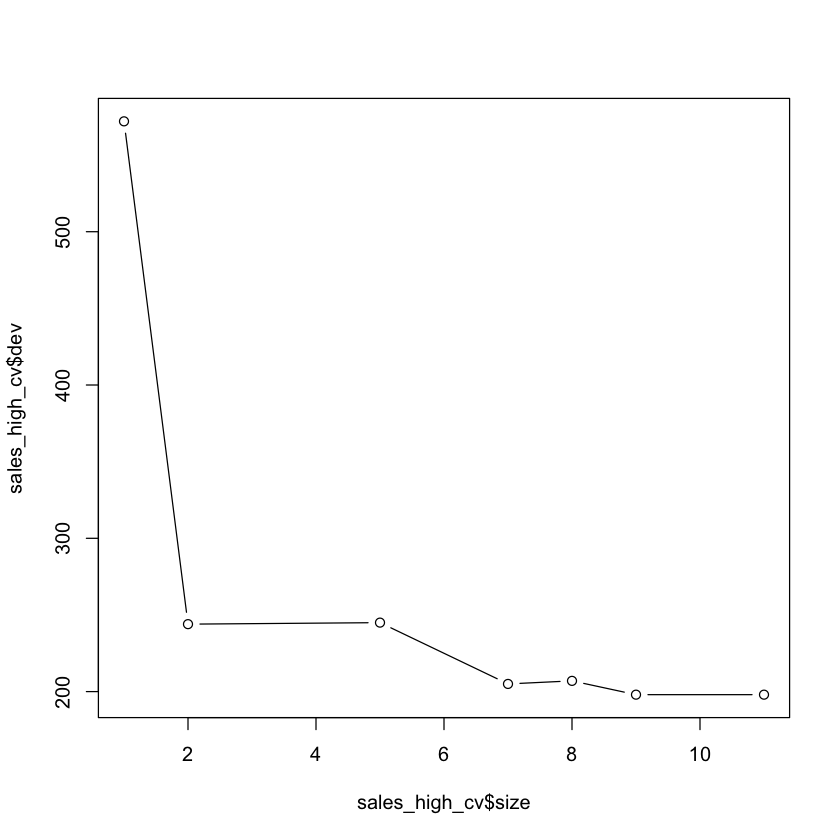

In [332]:
set.seed(1)
sales_high_cv <- cv.tree(sales_high_tree, FUN = prune.misclass)
sales_high_cv
plot(sales_high_cv$size, sales_high_cv$dev, type = "b")

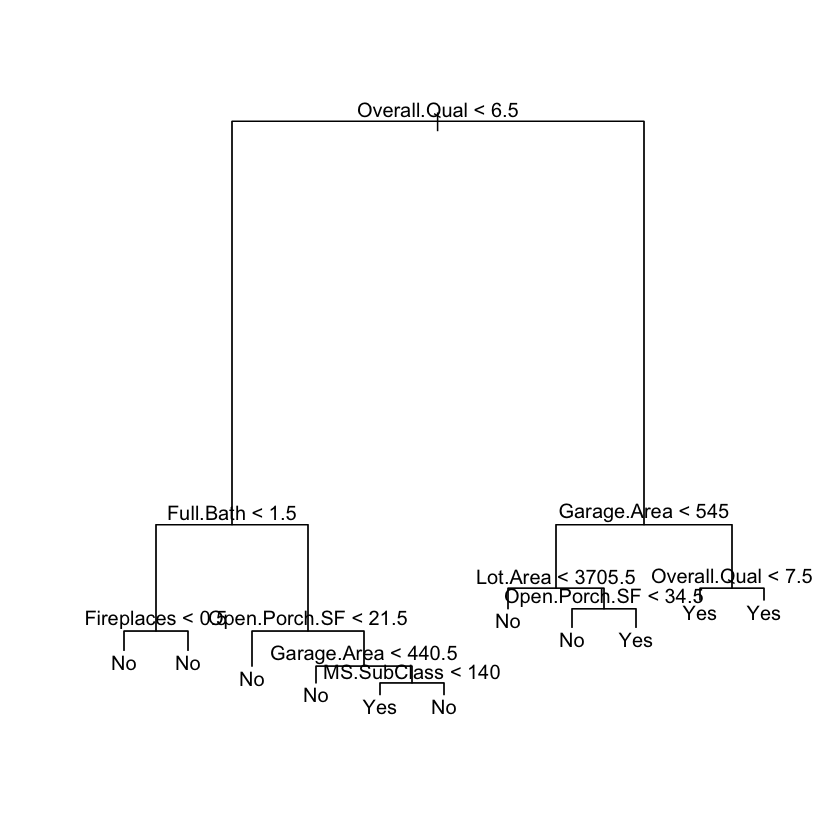

In [333]:
size_opt <- sales_high_cv$size[which.min(sales_high_cv$dev)]
sales_high_pruned <- prune.misclass(sales_high_tree, best = size_opt)
plot(sales_high_pruned)
text(sales_high_pruned, pretty = 0)

Warning message in prune.tree(tree = sales_high_tree, best = i, method = "misclass"):
"best is bigger than tree size"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"
Warning message in pred1.tree(object, tree.matrix(newdata)):
"NAs introduced by coercion"


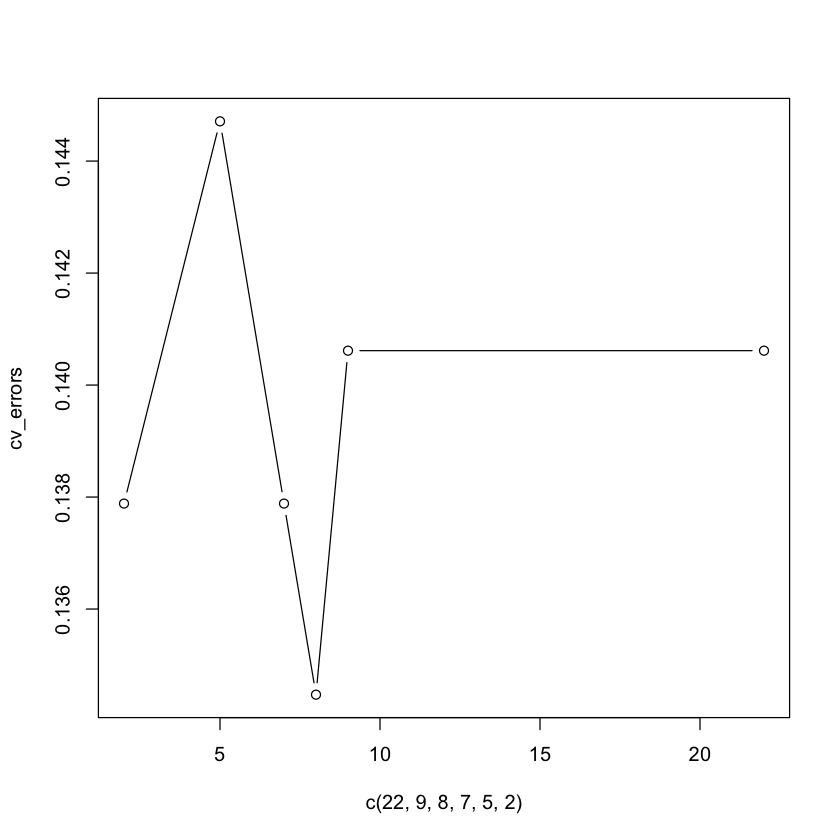

In [341]:
# iterate over tree sizes, and compute test error for each tree

cv_errors <- NULL
for (i in c(22, 9, 8, 7, 5, 2)) {
  pruned <- prune.misclass(sales_high_tree, best=i)
  pruned_pred <- predict(pruned, newdata = dataE[test,], type = "class")
  score <- mean(pruned_pred != dataE$Expensive[test])
  cv_errors <- c(cv_errors, score)
}

# plot errors 
plot(c(22, 9, 8, 7, 5, 2), cv_errors, type = "b")

Najlepsze wyniki na zbiorze testowym osiąga drzewo o wielkości 8